In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
%matplotlib inline
import matplotlib.pyplot as plt

import sys 
import inspect
import seaborn as sns
import os

import perturbseq as perturb
import sc_eVIP

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()
sc.set_figure_params(figsize=(4,4),dpi=200)

scanpy==1.5.1 anndata==0.7.1 umap==0.4.4 numpy==1.17.2 scipy==1.4.1 pandas==0.24.2 scikit-learn==0.22 statsmodels==0.11.0 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.8.1


In [2]:
PROTEIN='TP53'
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14'
SUBSAMPLED=DATA+'/'+PROTEIN+'/subsampled/A549.'+PROTEIN

counts=20000

FIGS=DATA+'/2021-03-22_Figures/'
os.system('mkdir -p '+FIGS)
print(FIGS)

sc.settings.figdir=FIGS

/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2021-03-22_Figures/


In [3]:
adata=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.h5ad',cache=False)
adata

Only considering the two last: ['.analysis', '.h5ad'].
Only considering the two last: ['.analysis', '.h5ad'].


AnnData object with n_obs × n_vars = 162314 × 1224 
    obs: 'TP53_A159P', 'TP53_A159V', 'TP53_C135F', 'TP53_C135Y', 'TP53_C141Y', 'TP53_C176F', 'TP53_C176Y', 'TP53_C238F', 'TP53_C238Y', 'TP53_C242F', 'TP53_C275F', 'TP53_C275Y', 'TP53_C277F', 'TP53_E271K', 'TP53_E285K', 'TP53_E286K', 'TP53_G105C', 'TP53_G154V', 'TP53_G244C', 'TP53_G245C', 'TP53_G245D', 'TP53_G245S', 'TP53_G245V', 'TP53_G266E', 'TP53_G266R', 'TP53_G266V', 'TP53_H179R', 'TP53_H179Y', 'TP53_H193L', 'TP53_H193R', 'TP53_H193Y', 'TP53_H214R', 'TP53_I195T', 'TP53_K132N', 'TP53_K132R', 'TP53_L194R', 'TP53_M237I', 'TP53_M246V', 'TP53_P151S', 'TP53_P152L', 'TP53_P250L', 'TP53_P278L', 'TP53_P278S', 'TP53_R110L', 'TP53_R158H', 'TP53_R158L', 'TP53_R175H', 'TP53_R213Q', 'TP53_R248L', 'TP53_R248W', 'TP53_R249M', 'TP53_R249S', 'TP53_R273C', 'TP53_R273H', 'TP53_R273L', 'TP53_R280K', 'TP53_R280T', 'TP53_R282W', 'TP53_R337C', 'TP53_R337L', 'TP53_S127F', 'TP53_S241C', 'TP53_S241F', 'TP53_V157F', 'TP53_V173L', 'TP53_V173M', 'TP53_V216M', '

In [4]:
for x in ['TP53_A159P', 'TP53_A159V', 'TP53_C135F', 'TP53_C135Y', 'TP53_C141Y', 'TP53_C176F', 'TP53_C176Y', 'TP53_C238F', 'TP53_C238Y', 'TP53_C242F', 'TP53_C275F', 'TP53_C275Y', 'TP53_C277F', 'TP53_E271K', 'TP53_E285K', 'TP53_E286K', 'TP53_G105C', 'TP53_G154V', 'TP53_G244C', 'TP53_G245C', 'TP53_G245D', 'TP53_G245S', 'TP53_G245V', 'TP53_G266E', 'TP53_G266R', 'TP53_G266V', 'TP53_H179R', 'TP53_H179Y', 'TP53_H193L', 'TP53_H193R', 'TP53_H193Y', 'TP53_H214R', 'TP53_I195T', 'TP53_K132N', 'TP53_K132R', 'TP53_L194R', 'TP53_M237I', 'TP53_M246V', 'TP53_P151S', 'TP53_P152L', 'TP53_P250L', 'TP53_P278L', 'TP53_P278S', 'TP53_R110L', 'TP53_R158H', 'TP53_R158L', 'TP53_R175H', 'TP53_R213Q', 'TP53_R248L', 'TP53_R248W', 'TP53_R249M', 'TP53_R249S', 'TP53_R273C', 'TP53_R273H', 'TP53_R273L', 'TP53_R280K', 'TP53_R280T', 'TP53_R282W', 'TP53_R337C', 'TP53_R337L', 'TP53_S127F', 'TP53_S241C', 'TP53_S241F', 'TP53_V157F', 'TP53_V173L', 'TP53_V173M', 'TP53_V216M', 'TP53_V272L', 'TP53_V272M', 'TP53_WT', 'TP53_Y163C', 'TP53_Y205C', 'TP53_Y220C', 'TP53_Y234C', 'TP53_Y236C', 'TP53_p.Al83Vl', 'TP53_p.Ar158Ar', 'TP53_p.Asp21Asp', 'TP53_p.Gln5Ar', 'TP53_p.Glu2Glu', 'TP53_p.Glu339Lys', 'TP53_p.Gly360Vl', 'TP53_p.Leu344Leu', 'TP53_p.Pro153Pro', 'TP53_p.Pro222Pro', 'TP53_p.Pro295Pro', 'TP53_p.Pro301Pro', 'TP53_p.Pro359Pro', 'TP53_p.Pro36Pro', 'TP53_p.Pro47Pro', 'TP53_p.Pro47Ser', 'TP53_p.Pro58Ar', 'TP53_p.Ser366Al', 'TP53_p.Thr118Thr', 'TP53_p.Thr170Thr', 'TP53_p.Thr312Ser', 'TP53_p.Tyr107His', 'TP53_p.Vl216Vl', 'TP53_p.Vl31Ile', 'batch']:
    del adata.obs[x]
adata

AnnData object with n_obs × n_vars = 162314 × 1224 
    obs: 'known', 'mut.std', 'mutant', 'n_counts', 'n_genes', 'percent_mito', 'n_counts_downsampled', 'n_counts_original', 'uninfected', 'vbc.counts', 'batch_num18', 'batch_num8', 'batch_num25', 'batch_num22', 'batch_num24', 'batch_num28', 'batch_num27', 'batch_num23', 'batch_num17', 'batch_num19', 'batch_num12', 'batch_num31', 'batch_num5', 'batch_num15', 'batch_num7', 'batch_num9', 'batch_num4', 'batch_num2', 'batch_num13', 'batch_num6', 'batch_num26', 'batch_num16', 'batch_num10', 'batch_num1', 'batch_num29', 'batch_num0', 'batch_num11', 'batch_num30', 'batch_num3', 'batch_num14', 'batch_num21', 'batch_num20', 'louvain'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
del adata.obsp['connectivities']
del adata.obsp['distances']

In [6]:
PROTEIN='TP53'
cells2guide_file='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-07-09/'+PROTEIN+'/processed_data/A549.'+PROTEIN+'.anno.vbc_TPTfiltered1.0_umi_counts.mut_std.gz'
cell2guide=pd.read_csv(cells2guide_file)
cell2guide.head()

V216V  P301P  Q5R  Y107H  A83V  R248L  H214R  P152L  V173L  R158R  ...  \
0    0.0    0.0  0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0  ...   
1    0.0    0.0  0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0  ...   
2    0.0    0.0  0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0  ...   
3    0.0    0.0  0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0  ...   
4    0.0    0.0  0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0  ...   

   R249S  R248W  C135F  R280K  K132N  G154V  S127F  Y220C  C275F  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                   cell  
0   ACGATGTGTCAACTGTch3  
1  ATTGGACTCGAGGTAGch15  
2  GTCATTTCAATGTAAGch31  
3   ACATGGTTCGCTTAGAch5  
4  AGATCTGTCGCCTGAGch21  

[5 rows x 100 columns]

In [7]:
new_obs_names=[]
for i in range(adata.n_obs):
    old_name=adata.obs_names[i]
    items=old_name.split('-')
    new_name=items[0]+'ch'+items[3]
    new_obs_names.append(new_name)
adata.obs_names=new_obs_names

In [8]:
perturb.io.read_perturbations_csv(adata,cell2guide_csv=cells2guide_file,sep=',')

adata cells: 162314
annotated cells: 252759 or 85.0 percent of adata


In [9]:
adata.obs['variant']=adata.obs['guide.compact']
adata.obs['variant.full']=adata.obs['guide']

In [10]:
perturb.pp.perturbs_per_cell(adata,perturbations_obs='variant')
perturb.pp.cells_per_perturb(adata,perturbations_obs='variant')

Found 99/99 
Found 99/99 perturbations


In [11]:
adata.write(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.new_format.allcells.h5ad')

... storing 'guide' as categorical
... storing 'guide.compact' as categorical
... storing 'variant' as categorical
... storing 'variant.full' as categorical


In [4]:
adata=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.new_format.allcells.h5ad',cache=False)
adata

Only considering the two last: ['.allcells', '.h5ad'].
Only considering the two last: ['.allcells', '.h5ad'].


AnnData object with n_obs × n_vars = 162314 × 1224 
    obs: 'known', 'mut.std', 'mutant', 'n_counts', 'n_genes', 'percent_mito', 'n_counts_downsampled', 'n_counts_original', 'uninfected', 'vbc.counts', 'batch_num18', 'batch_num8', 'batch_num25', 'batch_num22', 'batch_num24', 'batch_num28', 'batch_num27', 'batch_num23', 'batch_num17', 'batch_num19', 'batch_num12', 'batch_num31', 'batch_num5', 'batch_num15', 'batch_num7', 'batch_num9', 'batch_num4', 'batch_num2', 'batch_num13', 'batch_num6', 'batch_num26', 'batch_num16', 'batch_num10', 'batch_num1', 'batch_num29', 'batch_num0', 'batch_num11', 'batch_num30', 'batch_num3', 'batch_num14', 'batch_num21', 'batch_num20', 'louvain', 'C275Y', 'R175H', 'V272L', 'R249M', 'K132R', 'I195T', 'S241C', 'L344L', 'C176F', 'P278L', 'E286K', 'K132N', 'G244C', 'M237I', 'V173M', 'R158H', 'Q5R', 'T170T', 'P151S', 'E2E', 'Y234C', 'V173L', 'R248L', 'Y236C', 'T312S', 'R282W', 'WT', 'G245S', 'V216M', 'R213Q', 'R337C', 'H179Y', 'R248W', 'H193R', 'R280K', 'R337L',

In [5]:
cells_per_variant_singlets=np.array(adata.uns['cells_per_perturb.variant']['Number of cells']).flatten()
cells_per_variant=np.array(adata.uns['cells_per_perturb.variant.incl_multi_inf']['Number of cells']).flatten()
print(np.median(cells_per_variant_singlets))

926.0


In [6]:
variants_per_cell=adata.obs['perturbs_per_cell.variant']

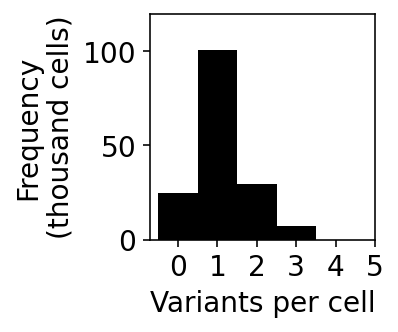

In [7]:
#put together stats into 1 plot for each


fw=2
fh=2

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)
a=plots.hist(variants_per_cell,range(5),color='black')
plots.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5])
plots.set_xticklabels([0,1,2,3,4,5])
plots.set_yticks([0,50000,100000])
plots.set_yticklabels([0,50,100])
plots.set_xlabel('Variants per cell')
plots.set_ylabel('Frequency\n(thousand cells)')
#plt.title('TP53')
plots.grid(False)
plots.set_ylim(0,120000)
plt.savefig(FIGS+'/TP53.VariantsPerCell.pdf',bbox_inches = "tight")
plt.savefig(FIGS+'/TP53.VariantsPerCell.png',bbox_inches = "tight")


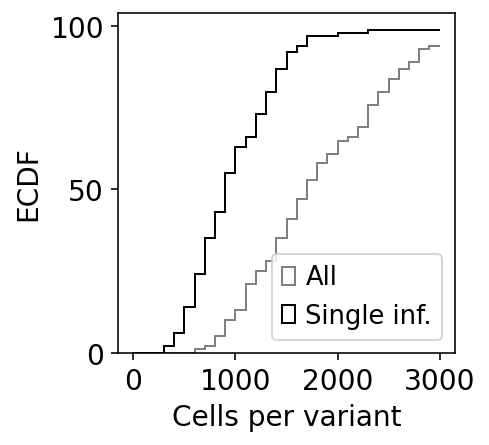

In [8]:
fw=3
fh=3

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)
n, bins, patches=plots.hist(cells_per_variant,[0,100,200,300,400,500,600,700,800,900,1000,
                                    1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,
                                                   2100,2200,2300,2400,2500,2600,2700,2800,2900,3000],
            cumulative=True,histtype='step',color='gray',label='All') 
patches[0].set_xy(patches[0].get_xy()[:-1])
n, bins, patches=plots.hist(cells_per_variant_singlets,[0,100,200,300,400,500,600,700,800,900,1000,
                                    1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,
                                                   2100,2200,2300,2400,2500,2600,2700,2800,2900,3000],
            cumulative=True,histtype='step',label='Single inf.',color='black') 
patches[0].set_xy(patches[0].get_xy()[:-1])
plots.set_xticks([0,1000,2000,3000])
plots.set_yticks([0,50,100])
plots.set_xlabel('Cells per variant')
plots.set_ylabel('ECDF')
#plots.set_title('TP53')
plt.legend(loc='lower right')
plots.grid(False)
plt.savefig(FIGS+'/TP53.CellsPerVariantECDF.pdf',bbox_inches = "tight")
plt.savefig(FIGS+'/TP53.CellsPerVariantECDF.png',bbox_inches = "tight")


In [9]:
FIGS

'/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2021-03-22_Figures/'

In [10]:
perturb.pp.get_perturbations(adata,perturbations_obs='variant')

In [11]:
def get_umis_per_vbc(adata_here,variants):
    
    #make a data frame, then sum rows and columns.
    anno=pd.DataFrame(index=list(adata_here.obs_names), columns=variants)
    
    for variant in variants:
        anno[variant]=list(adata_here.obs[variant])
        
    #take non-zero values
    vals=anno.to_numpy()
    nonzeros=vals[vals>0]
    return(nonzeros)

variants=adata.uns['PS.variant.list']
umis_per_vbc_tp53=get_umis_per_vbc(adata,variants)

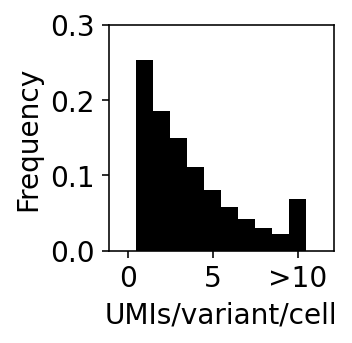

In [20]:
UPPER_BOUND=10
import copy
umis_per_vbc_tp532=copy.deepcopy(umis_per_vbc_tp53)
umis_per_vbc_tp532[umis_per_vbc_tp532>=UPPER_BOUND]=UPPER_BOUND

fw=2
fh=2

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)
plots.hist(umis_per_vbc_tp532,range(UPPER_BOUND+3),
            color='black',density=True)
plots.set_xticks([0.5,5.5,UPPER_BOUND+0.5])
plots.set_yticks([0,0.1,0.2,0.3])
plots.set_ylim(0,0.3)
plots.set_xticklabels(['0','5','>10'])
plots.set_xlabel('UMIs/variant/cell')
plots.set_ylabel('Frequency')
#plots.set_title('TP53')
plots.grid(False)
plt.savefig(FIGS+'/TP53.UMIsPerVbc.pdf',bbox_inches = "tight")
plt.savefig(FIGS+'/TP53.UMIsPerVbc.png',bbox_inches = "tight")


In [21]:
adata.write(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.new_format.allcells.h5ad')

In [3]:
adata=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.new_format.allcells.h5ad',cache=False)
adata

Only considering the two last: ['.allcells', '.h5ad'].
Only considering the two last: ['.allcells', '.h5ad'].


AnnData object with n_obs × n_vars = 162314 × 1224 
    obs: 'known', 'mut.std', 'mutant', 'n_counts', 'n_genes', 'percent_mito', 'n_counts_downsampled', 'n_counts_original', 'uninfected', 'vbc.counts', 'batch_num18', 'batch_num8', 'batch_num25', 'batch_num22', 'batch_num24', 'batch_num28', 'batch_num27', 'batch_num23', 'batch_num17', 'batch_num19', 'batch_num12', 'batch_num31', 'batch_num5', 'batch_num15', 'batch_num7', 'batch_num9', 'batch_num4', 'batch_num2', 'batch_num13', 'batch_num6', 'batch_num26', 'batch_num16', 'batch_num10', 'batch_num1', 'batch_num29', 'batch_num0', 'batch_num11', 'batch_num30', 'batch_num3', 'batch_num14', 'batch_num21', 'batch_num20', 'louvain', 'C275Y', 'R175H', 'V272L', 'R249M', 'K132R', 'I195T', 'S241C', 'L344L', 'C176F', 'P278L', 'E286K', 'K132N', 'G244C', 'M237I', 'V173M', 'R158H', 'Q5R', 'T170T', 'P151S', 'E2E', 'Y234C', 'V173L', 'R248L', 'Y236C', 'T312S', 'R282W', 'WT', 'G245S', 'V216M', 'R213Q', 'R337C', 'H179Y', 'R248W', 'H193R', 'R280K', 'R337L',

In [4]:
#plots for the supplement
perturb.pp.cells_per_perturb(adata, perturbations_obs='variant')

Found 99/99 perturbations


In [5]:
perturb.pp.obs_mean(adata,grouping_variable='variant',obs=['vbc.counts'],outpref='vbc_norm_expr')

AnnData object with n_obs × n_vars = 162314 × 1224 
    obs: 'known', 'mut.std', 'mutant', 'n_counts', 'n_genes', 'percent_mito', 'n_counts_downsampled', 'n_counts_original', 'uninfected', 'vbc.counts', 'batch_num18', 'batch_num8', 'batch_num25', 'batch_num22', 'batch_num24', 'batch_num28', 'batch_num27', 'batch_num23', 'batch_num17', 'batch_num19', 'batch_num12', 'batch_num31', 'batch_num5', 'batch_num15', 'batch_num7', 'batch_num9', 'batch_num4', 'batch_num2', 'batch_num13', 'batch_num6', 'batch_num26', 'batch_num16', 'batch_num10', 'batch_num1', 'batch_num29', 'batch_num0', 'batch_num11', 'batch_num30', 'batch_num3', 'batch_num14', 'batch_num21', 'batch_num20', 'louvain', 'C275Y', 'R175H', 'V272L', 'R249M', 'K132R', 'I195T', 'S241C', 'L344L', 'C176F', 'P278L', 'E286K', 'K132N', 'G244C', 'M237I', 'V173M', 'R158H', 'Q5R', 'T170T', 'P151S', 'E2E', 'Y234C', 'V173L', 'R248L', 'Y236C', 'T312S', 'R282W', 'WT', 'G245S', 'V216M', 'R213Q', 'R337C', 'H179Y', 'R248W', 'H193R', 'R280K', 'R337L',

In [9]:
variants=list(adata.uns['PS.variant.list'])
variants.append('unassigned')
print(variants)

['A159P', 'A159V', 'A83V', 'C135F', 'C135Y', 'C141Y', 'C176F', 'C176Y', 'C238F', 'C238Y', 'C242F', 'C275F', 'C275Y', 'C277F', 'D21D', 'E271K', 'E285K', 'E286K', 'E2E', 'E339K', 'G105C', 'G154V', 'G244C', 'G245C', 'G245D', 'G245S', 'G245V', 'G266E', 'G266R', 'G266V', 'G360V', 'H179R', 'H179Y', 'H193L', 'H193R', 'H193Y', 'H214R', 'I195T', 'K132N', 'K132R', 'L194R', 'L344L', 'M237I', 'M246V', 'P151S', 'P152L', 'P153P', 'P222P', 'P250L', 'P278L', 'P278S', 'P295P', 'P301P', 'P359P', 'P36P', 'P47P', 'P47S', 'P58R', 'Q5R', 'R110L', 'R158H', 'R158L', 'R158R', 'R175H', 'R213Q', 'R248L', 'R248W', 'R249M', 'R249S', 'R273C', 'R273H', 'R273L', 'R280K', 'R280T', 'R282W', 'R337C', 'R337L', 'S127F', 'S241C', 'S241F', 'S366A', 'T118T', 'T170T', 'T312S', 'V157F', 'V173L', 'V173M', 'V216M', 'V216V', 'V272L', 'V272M', 'V31I', 'WT', 'Y107H', 'Y163C', 'Y205C', 'Y220C', 'Y234C', 'Y236C', 'unassigned']


/ahg/regevdata/users/oursu/software/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


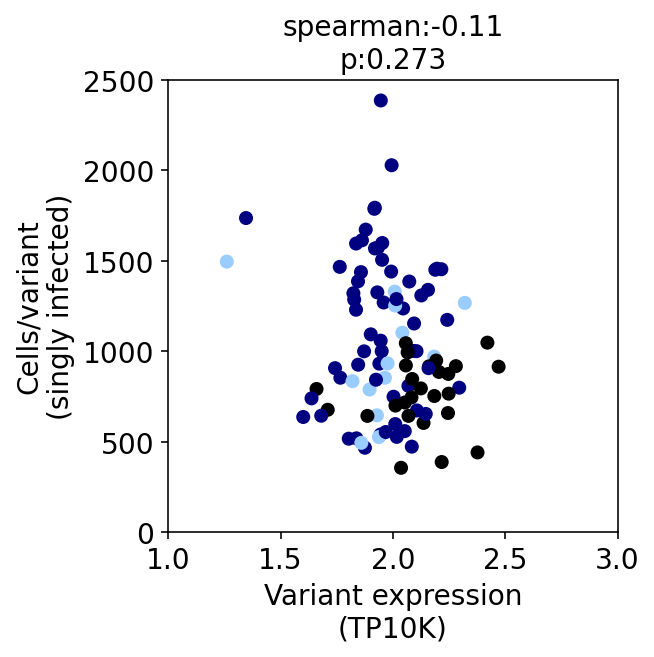

In [16]:
#average expression vs number of cells

ANNO=DATA+'/'+PROTEIN+'/anno'
anno=pd.read_csv(ANNO+'/'+PROTEIN+'.anno.complete3.csv',sep='\t',index_col=0)

def fun_scatter(x,y,xname='x',yname='y',width=4,height=4,corrtype='spearman',
                xlim=None,ylim=None,
                **kwargs):
    from scipy.stats import spearmanr, pearsonr
    if corrtype=='spearman':
        corr=spearmanr(x,y,nan_policy='omit')
    if corrtype=='pearson':
        corr=pearsonr(x,y)
    c,p="%.2g" % corr[0],"%.3g" % corr[1]
    fig,plots=plt.subplots(1)
    fig.set_size_inches(width,height)
    plots.scatter(x,y,**kwargs)
    plots.set_xlabel(xname)
    plots.set_ylabel(yname)
    if xlim!=None:
        plots.set_xlim(xlim)
    if ylim!=None:
        plots.set_ylim(ylim)
    plots.set_title(corrtype+':'+str(c)+'\n'+'p:'+str(p))
    
fun_scatter(10000.0*adata.uns['vbc_norm_expr'].loc[variants,'vbc.counts'],
            adata.uns['cells_per_perturb.variant'].loc[variants,'Number of cells'],
           c=anno.loc[variants,'cluster_color'])
plt.ylim(0,2500)
plt.xlim(1,3)
plt.grid(False)
plt.xlabel('Variant expression\n(TP10K)')
plt.ylabel('Cells/variant\n(singly infected)')

plt.savefig(FIGS+'/'+PROTEIN+'.vbc_expr_vs_numcells.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/'+PROTEIN+'.vbc_expr_vs_numcells.png',bbox_inches = "tight")

/ahg/regevdata/users/oursu/software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


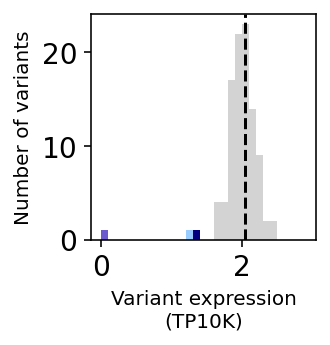

In [20]:
#histogram expression

anno['variant_expression']=(10000.0*adata.uns['vbc_norm_expr'].loc[variants,'vbc.counts']).loc[anno.index]

fig,plots=plt.subplots(1)
fig.set_size_inches(2,2)
bins=[x/10 for x in range(30)]
plots.hist(anno.loc[variants,'variant_expression'],color='lightgray',
          bins=bins)
plots.axvline(x=anno.loc['WT','variant_expression'],
             color='black',linestyle='--')
for v in ['M237I','Y236C']:
    plots.hist(anno.loc[v,
        'variant_expression'],color=anno.loc[v,'cluster_color'],bins=bins)
plots.hist(anno.loc['unassigned',
        'variant_expression'],color='slateblue',bins=bins)
plots.grid(False)
plots.set_xlabel('Variant expression\n(TP10K)',fontsize=10)
plots.set_ylabel('Number of variants',fontsize=10)

plt.savefig(FIGS+'/'+PROTEIN+'.expr_hist.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/'+PROTEIN+'.expr_hist.png',bbox_inches = "tight")

Computing MOI and detection probability using code from Dixit et al., 2016
number of distinct perturbations 99
MOI: 0.77
Detection probability: 0.78


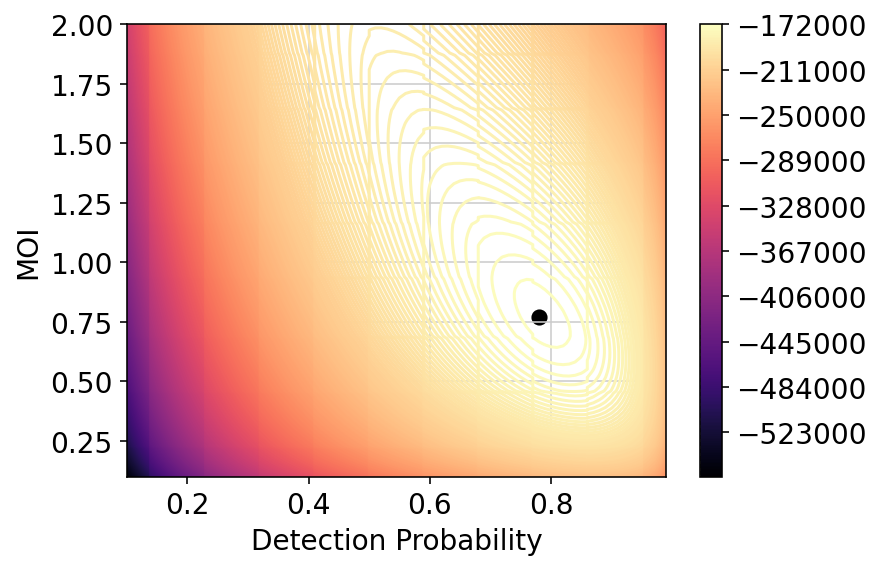

In [23]:
perturb.tl.moi(adata,perturbations_obs='variant')

In [26]:
c1=adata.obs['vbc.counts']
c2=np.divide(adata.obs.loc[:,variants].sum(axis=1),adata.obs['n_counts_original'])
c2.shape

(162314,)

In [27]:
(c1-c2).sum()

0.0

Save a low-MOI dataset as well
==

In [4]:
singles=perturb.pp.subset_singly_perturbed(adata,keep_unassigned=False,copy=True)
singles

Found 99/99 


View of AnnData object with n_obs × n_vars = 100760 × 1224 
    obs: 'known', 'mut.std', 'mutant', 'n_counts', 'n_genes', 'percent_mito', 'n_counts_downsampled', 'n_counts_original', 'uninfected', 'vbc.counts', 'batch_num18', 'batch_num8', 'batch_num25', 'batch_num22', 'batch_num24', 'batch_num28', 'batch_num27', 'batch_num23', 'batch_num17', 'batch_num19', 'batch_num12', 'batch_num31', 'batch_num5', 'batch_num15', 'batch_num7', 'batch_num9', 'batch_num4', 'batch_num2', 'batch_num13', 'batch_num6', 'batch_num26', 'batch_num16', 'batch_num10', 'batch_num1', 'batch_num29', 'batch_num0', 'batch_num11', 'batch_num30', 'batch_num3', 'batch_num14', 'batch_num21', 'batch_num20', 'louvain', 'C275Y', 'R175H', 'V272L', 'R249M', 'K132R', 'I195T', 'S241C', 'L344L', 'C176F', 'P278L', 'E286K', 'K132N', 'G244C', 'M237I', 'V173M', 'R158H', 'Q5R', 'T170T', 'P151S', 'E2E', 'Y234C', 'V173L', 'R248L', 'Y236C', 'T312S', 'R282W', 'WT', 'G245S', 'V216M', 'R213Q', 'R337C', 'H179Y', 'R248W', 'H193R', 'R280K', 

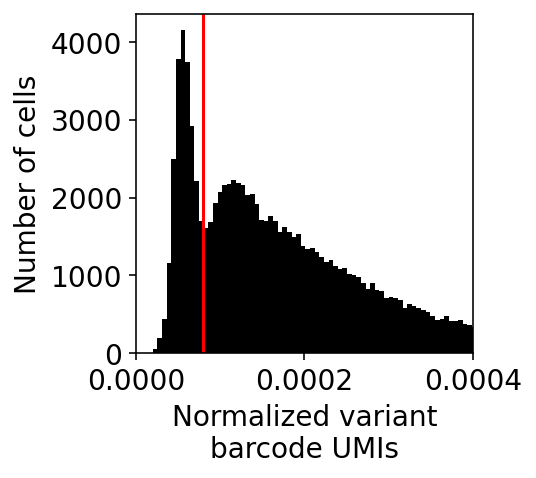

In [17]:
fw=3
fh=3

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)
x=plt.hist(singles.obs['vbc.counts'],1200,color='black')
plt.axvline(x=0.00008,color='red')

plt.xlabel('Normalized variant\nbarcode UMIs')
plt.ylabel('Number of cells')
plt.xticks([0,0.0002,0.0004])
plt.xlim(0,0.0004)
plt.grid(False)
plt.savefig(FIGS+'/'+PROTEIN+'.NormUMIsPerCell_singles.pdf',bbox_inches = "tight")
plt.savefig(FIGS+'/'+PROTEIN+'.NormUMIsPerCell_singles.png',bbox_inches = "tight")


A good threshold for UMIs is 0.0008. 

Let's apply it and get a new dataset.

In [6]:
perturbations=adata.uns['PS.variant.list']

In [7]:
import copy
perturbs=copy.deepcopy(adata.obs.loc[:,perturbations])
perturbs=perturbs.div(adata.obs['n_counts_original'],axis='rows')

In [8]:
perturbs2=1.0*(perturbs>0.00008)

In [9]:
adata_low=adata.copy()
adata_low

AnnData object with n_obs × n_vars = 162314 × 1224 
    obs: 'known', 'mut.std', 'mutant', 'n_counts', 'n_genes', 'percent_mito', 'n_counts_downsampled', 'n_counts_original', 'uninfected', 'vbc.counts', 'batch_num18', 'batch_num8', 'batch_num25', 'batch_num22', 'batch_num24', 'batch_num28', 'batch_num27', 'batch_num23', 'batch_num17', 'batch_num19', 'batch_num12', 'batch_num31', 'batch_num5', 'batch_num15', 'batch_num7', 'batch_num9', 'batch_num4', 'batch_num2', 'batch_num13', 'batch_num6', 'batch_num26', 'batch_num16', 'batch_num10', 'batch_num1', 'batch_num29', 'batch_num0', 'batch_num11', 'batch_num30', 'batch_num3', 'batch_num14', 'batch_num21', 'batch_num20', 'louvain', 'C275Y', 'R175H', 'V272L', 'R249M', 'K132R', 'I195T', 'S241C', 'L344L', 'C176F', 'P278L', 'E286K', 'K132N', 'G244C', 'M237I', 'V173M', 'R158H', 'Q5R', 'T170T', 'P151S', 'E2E', 'Y234C', 'V173L', 'R248L', 'Y236C', 'T312S', 'R282W', 'WT', 'G245S', 'V216M', 'R213Q', 'R337C', 'H179Y', 'R248W', 'H193R', 'R280K', 'R337L',

In [10]:
adata_low.obs.loc[:,perturbations]=perturbs2
perturbations=adata_low.uns['PS.variant.list']
perturb.pp.perturbs_per_cell(adata_low,perturbations_obs='variant')
perturb.pp.cells_per_perturb(adata_low,perturbations_obs='variant')

Found 99/99 
Found 99/99 perturbations


Computing MOI and detection probability using code from Dixit et al., 2016
number of distinct perturbations 99
MOI: 0.69
Detection probability: 0.6


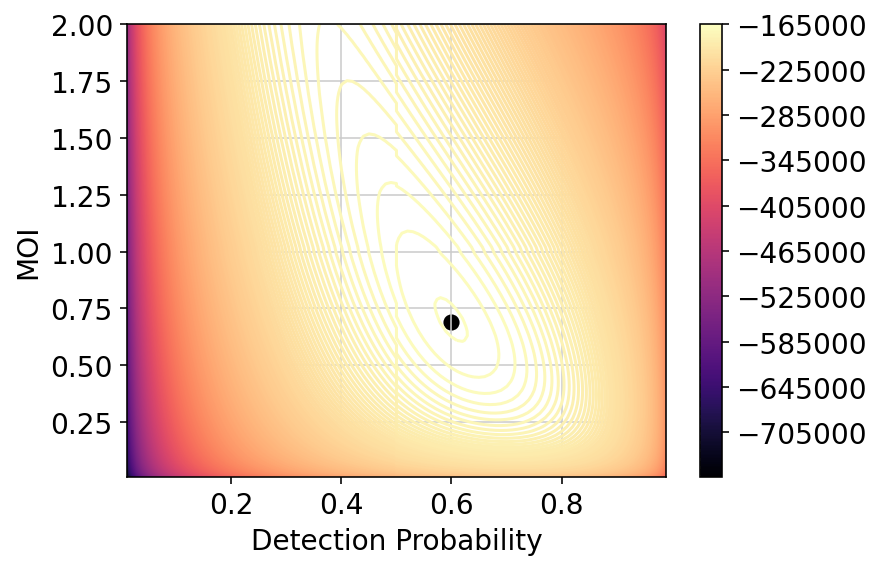

In [11]:
perturb.tl.moi(adata_low,perturbations_obs='variant')

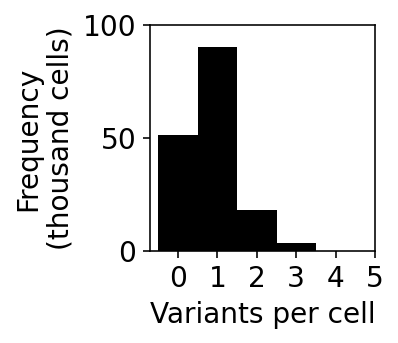

In [19]:
#put together stats into 1 plot for each

variants_per_cell=adata_low.obs['perturbs_per_cell.variant']

fw=2
fh=2

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)
a=plots.hist(variants_per_cell,range(5),color='black')
plots.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5])
plots.set_xticklabels([0,1,2,3,4,5])
plots.set_yticks([0,50000,100000])
plots.set_yticklabels([0,50,100])
plots.set_xlabel('Variants per cell')
plots.set_ylabel('Frequency\n(thousand cells)')
#plt.title('TP53')
plots.grid(False)
plots.set_ylim(0,100000)
plt.savefig(FIGS+'/TP53.VariantsPerCell.lowMOI.pdf',bbox_inches = "tight")
plt.savefig(FIGS+'/TP53.VariantsPerCell.lowMOI.png',bbox_inches = "tight")

In [22]:
cells_per_variant_singlets=np.array(adata_low.uns['cells_per_perturb.variant']['Number of cells']).flatten()
cells_per_variant=np.array(adata_low.uns['cells_per_perturb.variant.incl_multi_inf']['Number of cells']).flatten()
print(np.median(cells_per_variant_singlets))

870.0


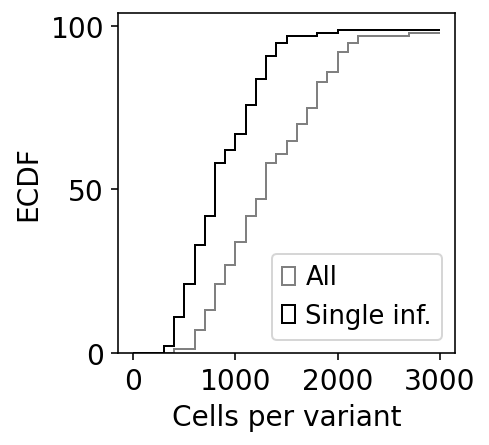

In [23]:
fw=3
fh=3

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)
n, bins, patches=plots.hist(cells_per_variant,[0,100,200,300,400,500,600,700,800,900,1000,
                                    1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,
                                                   2100,2200,2300,2400,2500,2600,2700,2800,2900,3000],
            cumulative=True,histtype='step',color='gray',label='All') 
patches[0].set_xy(patches[0].get_xy()[:-1])
n, bins, patches=plots.hist(cells_per_variant_singlets,[0,100,200,300,400,500,600,700,800,900,1000,
                                    1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,
                                                   2100,2200,2300,2400,2500,2600,2700,2800,2900,3000],
            cumulative=True,histtype='step',label='Single inf.',color='black') 
patches[0].set_xy(patches[0].get_xy()[:-1])
plots.set_xticks([0,1000,2000,3000])
plots.set_yticks([0,50,100])
plots.set_xlabel('Cells per variant')
plots.set_ylabel('ECDF')
#plots.set_title('TP53')
plt.legend(loc='lower right')
plots.grid(False)
plt.savefig(FIGS+'/TP53.CellsPerVariantECDF.lowMOI.pdf',bbox_inches = "tight")
plt.savefig(FIGS+'/TP53.CellsPerVariantECDF.lowMOI.png',bbox_inches = "tight")


In [24]:
adata_low.write(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.new_format.allcells.lowMOI.h5ad')

Re-doing analyses for low MOI dataset
==

In [12]:
adata=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.new_format.allcells.lowMOI.h5ad',cache=False)
adata

Only considering the two last: ['.lowMOI', '.h5ad'].
Only considering the two last: ['.lowMOI', '.h5ad'].


AnnData object with n_obs × n_vars = 162314 × 1224 
    obs: 'known', 'mut.std', 'mutant', 'n_counts', 'n_genes', 'percent_mito', 'n_counts_downsampled', 'n_counts_original', 'uninfected', 'vbc.counts', 'batch_num18', 'batch_num8', 'batch_num25', 'batch_num22', 'batch_num24', 'batch_num28', 'batch_num27', 'batch_num23', 'batch_num17', 'batch_num19', 'batch_num12', 'batch_num31', 'batch_num5', 'batch_num15', 'batch_num7', 'batch_num9', 'batch_num4', 'batch_num2', 'batch_num13', 'batch_num6', 'batch_num26', 'batch_num16', 'batch_num10', 'batch_num1', 'batch_num29', 'batch_num0', 'batch_num11', 'batch_num30', 'batch_num3', 'batch_num14', 'batch_num21', 'batch_num20', 'louvain', 'C275Y', 'R175H', 'V272L', 'R249M', 'K132R', 'I195T', 'S241C', 'L344L', 'C176F', 'P278L', 'E286K', 'K132N', 'G244C', 'M237I', 'V173M', 'R158H', 'Q5R', 'T170T', 'P151S', 'E2E', 'Y234C', 'V173L', 'R248L', 'Y236C', 'T312S', 'R282W', 'WT', 'G245S', 'V216M', 'R213Q', 'R337C', 'H179Y', 'R248W', 'H193R', 'R280K', 'R337L',

In [13]:
variants=list(adata.uns['PS.variant.list'])
variants.append('unassigned')

In [14]:
#scores on original dataset
#get the impactful as the ones called at 1000 cells
SCORE_DIR=DATA+'/'+PROTEIN+'/scoring/scores'
scorefile=SCORE_DIR+'/scores.iter0.cells1000.cells.csv'
scores=pd.read_csv(scorefile,header=0,index_col=0)
scores.head()

avg.pearson.mean  avg.pearson.ci.0.95.low  \
unassigned          0.714310                 0.693012   
V173M               1.527210                 1.511067   
P47S                0.288396                 0.274315   
P152L               0.947292                 0.928515   
C176Y               1.422377                 1.407831   

            avg.pearson.ci.0.95.high  avg.pearson.q  HotellingT2.mean  \
unassigned                  0.735607       0.000010        166.613473   
V173M                       1.543353       0.000010        373.069919   
P47S                        0.302478       0.444444         35.886533   
P152L                       0.966069       0.000010        117.255268   
C176Y                       1.436922       0.000010        246.055616   

            HotellingT2.ci.0.95.low  HotellingT2.ci.0.95.high  HotellingT2.q  
unassigned               154.356763                178.870184       0.000010  
V173M                    347.948070                398.191769       0.000010  
P47S                      31.691899                 40.081167       0.320944  
P152L                    107.122465                127.388072       0.000010  
C176Y                    229.470321                262.640912       0.000010

In [15]:
#score current dataset

#read in the annotation file to add the clusters to it
FDR=0.01
#original anno
ANNO=DATA+'/'+PROTEIN+'/anno'
anno=pd.read_csv(ANNO+'/'+PROTEIN+'.anno.complete3.csv',sep='\t')

anno.index=anno['Variant']

anno['Position']=anno['Position'].astype('Int32')
anno['Count_pancan']=anno['Count_pancan'].astype('Int32')
anno['Count_ExAC']=anno['Count_ExAC'].astype('Int32')

syn=list(set(anno.loc[anno['control_status']=='synonymous','Variant']).intersection(set(variants)))
print(syn)
impactful=list(set(list(anno.loc[anno['control_status']=='unknown',:].index)).intersection(set(variants)))
print(len(impactful))

#HotellingT2 ========================================
myrng=np.random.RandomState(1234)
adata_sub=perturb.pp.subsample_cells(adata,1000,'variant',rng=myrng)
dataset=pd.DataFrame(adata_sub.obsm['X_pca'][:,:20],
             index=adata_sub.obs_names,
            columns=range(20))
labels=pd.DataFrame({'label':adata_sub.obs['variant']})
labels.index=adata_sub.obs_names


#compute scores and their FDRs
scores_hotel=sc_eVIP.score.compare_groups_with_reference(dataset,
                          labels,
                         variants,
                          syn,
                         methods=['HotellingT2'],
                         n_bootstrap_controls=0)

['T170T', 'P47P', 'R158R', 'V216V', 'P359P', 'D21D', 'P301P', 'L344L', 'P222P', 'P36P', 'P295P', 'E2E', 'WT', 'P153P', 'T118T']
74
Found 15/15 controls
99 %

In [9]:
scores_hotel.to_csv('/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/clustering/TP53.scores.lowMOI.csv')

In [22]:
scores_hotel=pd.read_csv('/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/clustering/TP53.scores.lowMOI.csv',
                        index_col=0)

scores_hotel.head()

HotellingT2.mean  HotellingT2.ci.0.95.low  HotellingT2.ci.0.95.high  \
WT            27.782962                22.688180                 32.877743   
E285K        270.243796               246.793259                293.694332   
G245S        313.693973               288.929348                338.458597   
G244C        359.249158               329.157800                389.340515   
V216V         39.516576                33.144295                 45.888857   

       HotellingT2.q  
WT          0.536758  
E285K       0.000010  
G245S       0.000010  
G244C       0.000010  
V216V       0.207903

In [23]:
#find fdr thresholds
method='HotellingT2'

def get_threshold_at_FDR(fdr_data,scorename,signame,FDR=0.1,higher=True):
    fdr_passed=fdr_data.loc[fdr_data[signame]<=FDR,:]
    if higher:
        fdr_passed=fdr_passed.sort_values(by=scorename,ascending=True)
    else:
        fdr_passed=fdr_passed.sort_values(by=scorename,ascending=False)
    score_thresh_value=float(list(fdr_passed[scorename])[0])
    return(score_thresh_value)

t1=get_threshold_at_FDR(scores,scorename=method+'.mean',
                                signame=method+'.q',
                                FDR=0.05)
t2=get_threshold_at_FDR(scores_hotel,scorename=method+'.mean',
                                signame=method+'.q',
                                FDR=0.05)

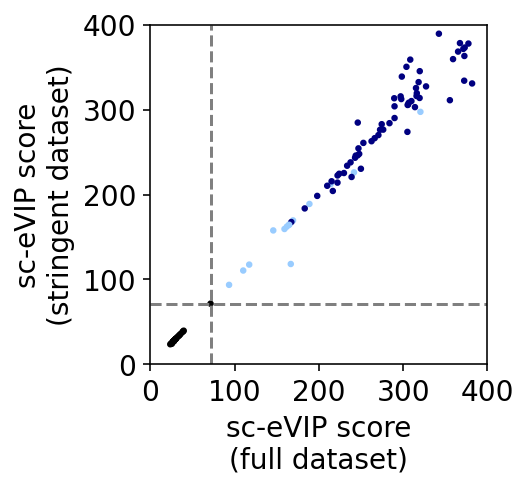

In [24]:
fw=3
fh=3

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)



variants=list(scores_hotel.index)
plots.scatter(scores.loc[variants,method+'.mean'],
           scores_hotel.loc[variants,method+'.mean'],s=5,
           color=anno.loc[variants,'cluster_color'])
plt.grid(False)
plots.set_xlabel('sc-eVIP score\n(full dataset)')
plots.set_ylabel('sc-eVIP score\n(stringent dataset)')
plots.set_xlim(0,400)
plots.set_ylim(0,400)
plt.axvline(x=t1,linestyle='--',color='gray')
plt.axhline(y=t2,linestyle='--',color='gray')
plt.savefig(FIGS+'/TP53.scoreComparison.lowMOI.pdf',bbox_inches = "tight")
plt.savefig(FIGS+'/TP53.scoreComparison.lowMOI.png',bbox_inches = "tight")


In [25]:
#get bulk, cluster it
perturb.tl.bulk(adata_sub,'variant')

Trying to set attribute `.obs` of view, copying.


In [26]:
sc_bulk_singles=adata_sub.uns['bulk.variant'].T.loc[:,variants].T

In [27]:
#save bulk for the clustering
res=DATA+'/'+PROTEIN+'/clustering/'+PROTEIN
os.system('mkdir -p '+DATA+'/'+PROTEIN+'/clustering/')
sc_bulk_singles.to_csv(res+'.bulk_2021-03-23.lowMOI.csv')
print(res+'.bulk_2021-03-23.lowMOI.csv')

/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/clustering/TP53.bulk_2021-03-23.lowMOI.csv


In [44]:
f='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/clustering/TP53.corrL1.sorted_variants_lowMOI.csv'
#cluster info
sorted_variants_df=pd.read_csv(f,header=None)
sorted_variants_df.index=sorted_variants_df[0]
anno['cluster_color']=sorted_variants_df.loc[anno.index,1]
sorted_variants=list(sorted_variants_df[0])
print(sorted_variants)

['R158R', 'T118T', 'P153P', 'E2E', 'P47P', 'Q5R', 'P359P', 'T170T', 'D21D', 'A83V', 'P295P', 'Y107H', 'WT', 'P301P', 'L344L', 'P47S', 'P222P', 'T312S', 'S366A', 'V216V', 'G360V', 'V31I', 'E339K', 'P36P', 'P58R', 'R337C', 'R337L', 'unassigned', 'R213Q', 'P152L', 'S241C', 'R273H', 'R273L', 'R273C', 'C277F', 'R280K', 'K132R', 'R158H', 'M246V', 'M237I', 'G154V', 'Y220C', 'Y236C', 'Y234C', 'G266E', 'R158L', 'V272L', 'E271K', 'A159V', 'C242F', 'Y163C', 'Y205C', 'R280T', 'S241F', 'R248W', 'R248L', 'H179R', 'G245C', 'K132N', 'V216M', 'C238F', 'G105C', 'E285K', 'G266V', 'A159P', 'G245S', 'P278L', 'C238Y', 'R249S', 'V173L', 'V157F', 'C176Y', 'P250L', 'R282W', 'H193R', 'S127F', 'R110L', 'H193Y', 'H214R', 'V272M', 'C141Y', 'C135Y', 'G245V', 'C176F', 'L194R', 'R249M', 'C275Y', 'C135F', 'G266R', 'H193L', 'P151S', 'R175H', 'H179Y', 'P278S', 'G244C', 'I195T', 'E286K', 'V173M', 'G245D', 'C275F']


/ahg/regevdata/users/oursu/software/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 8 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


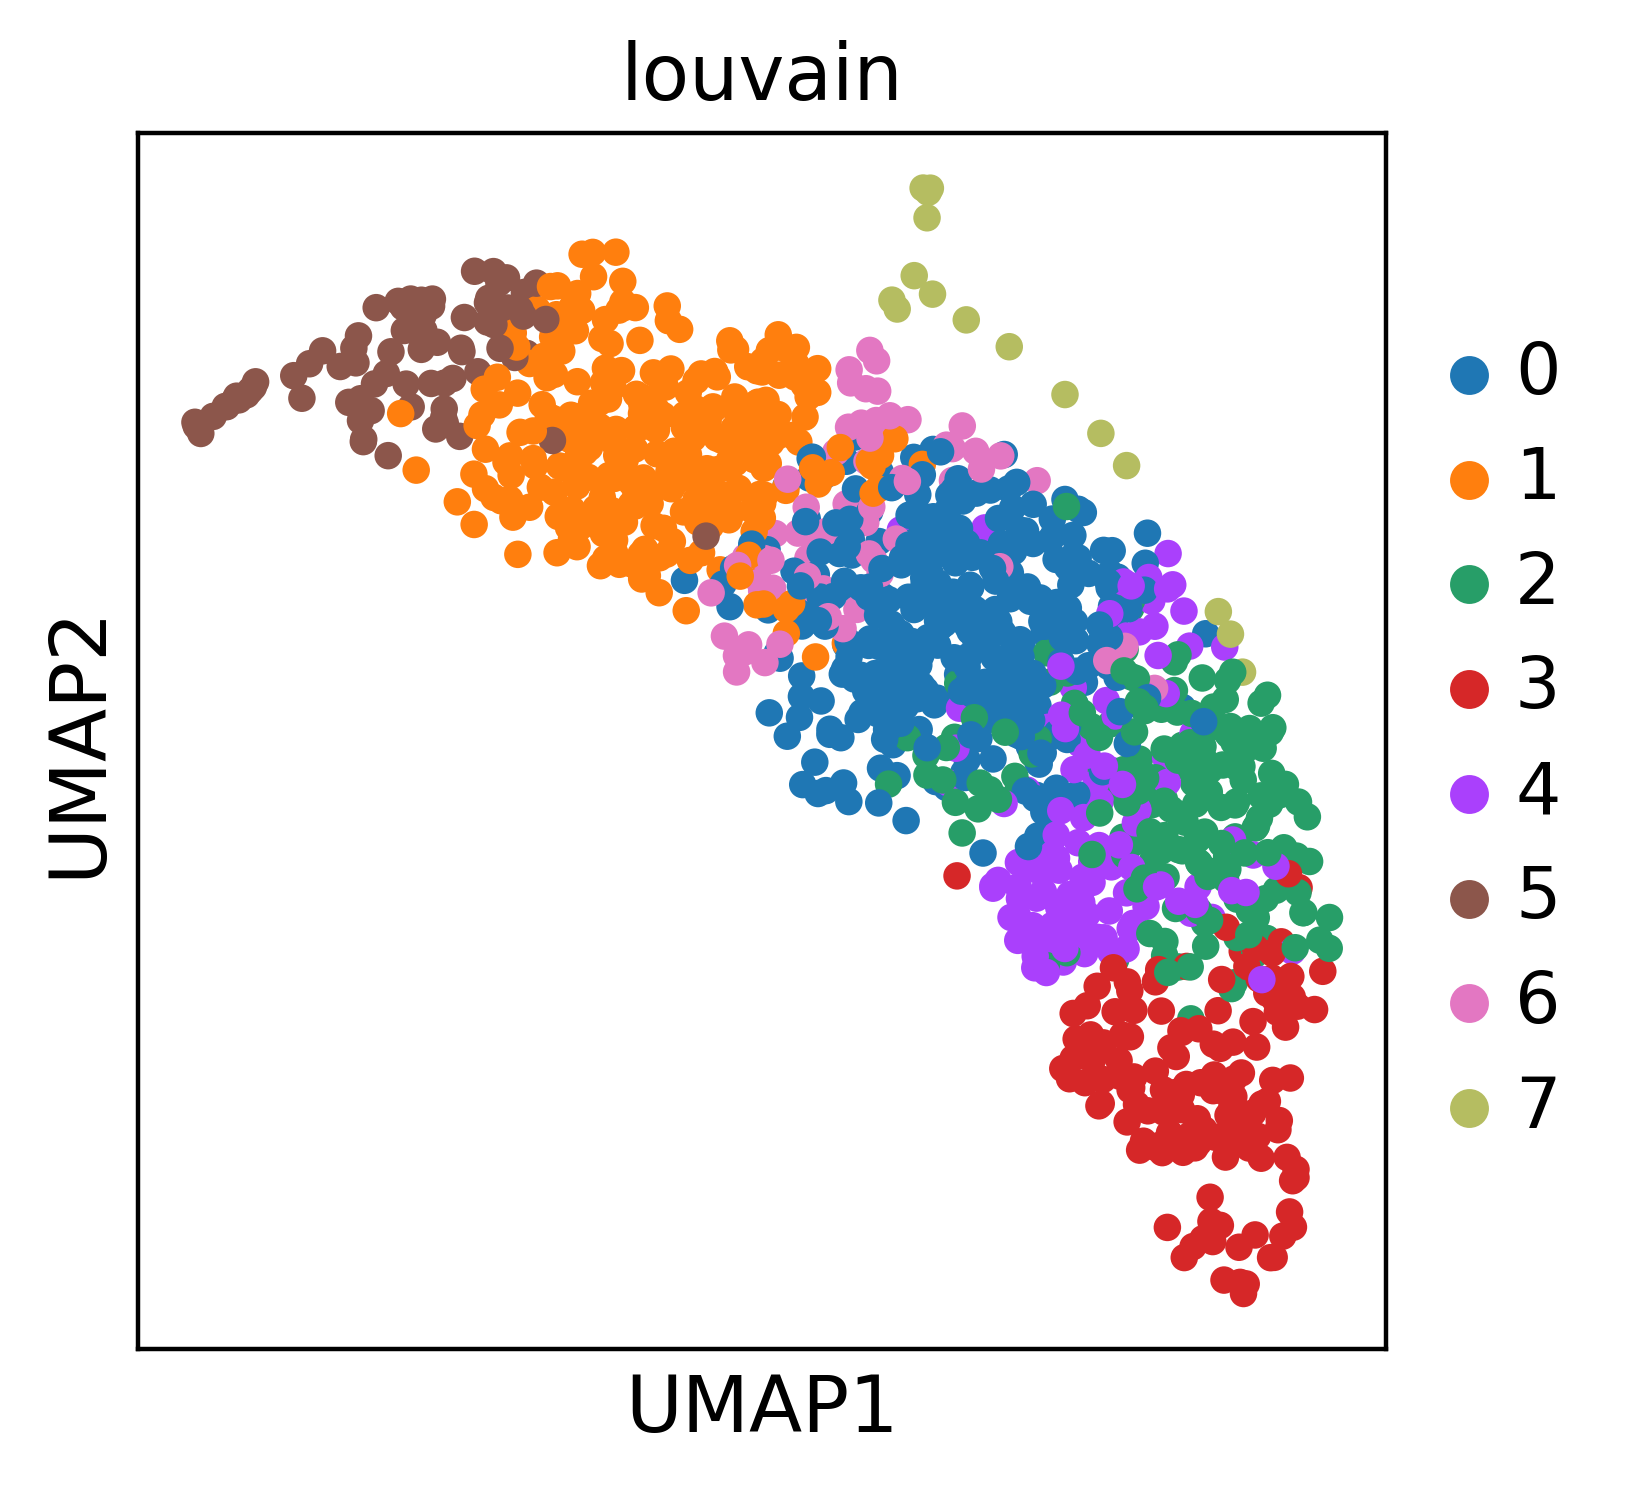

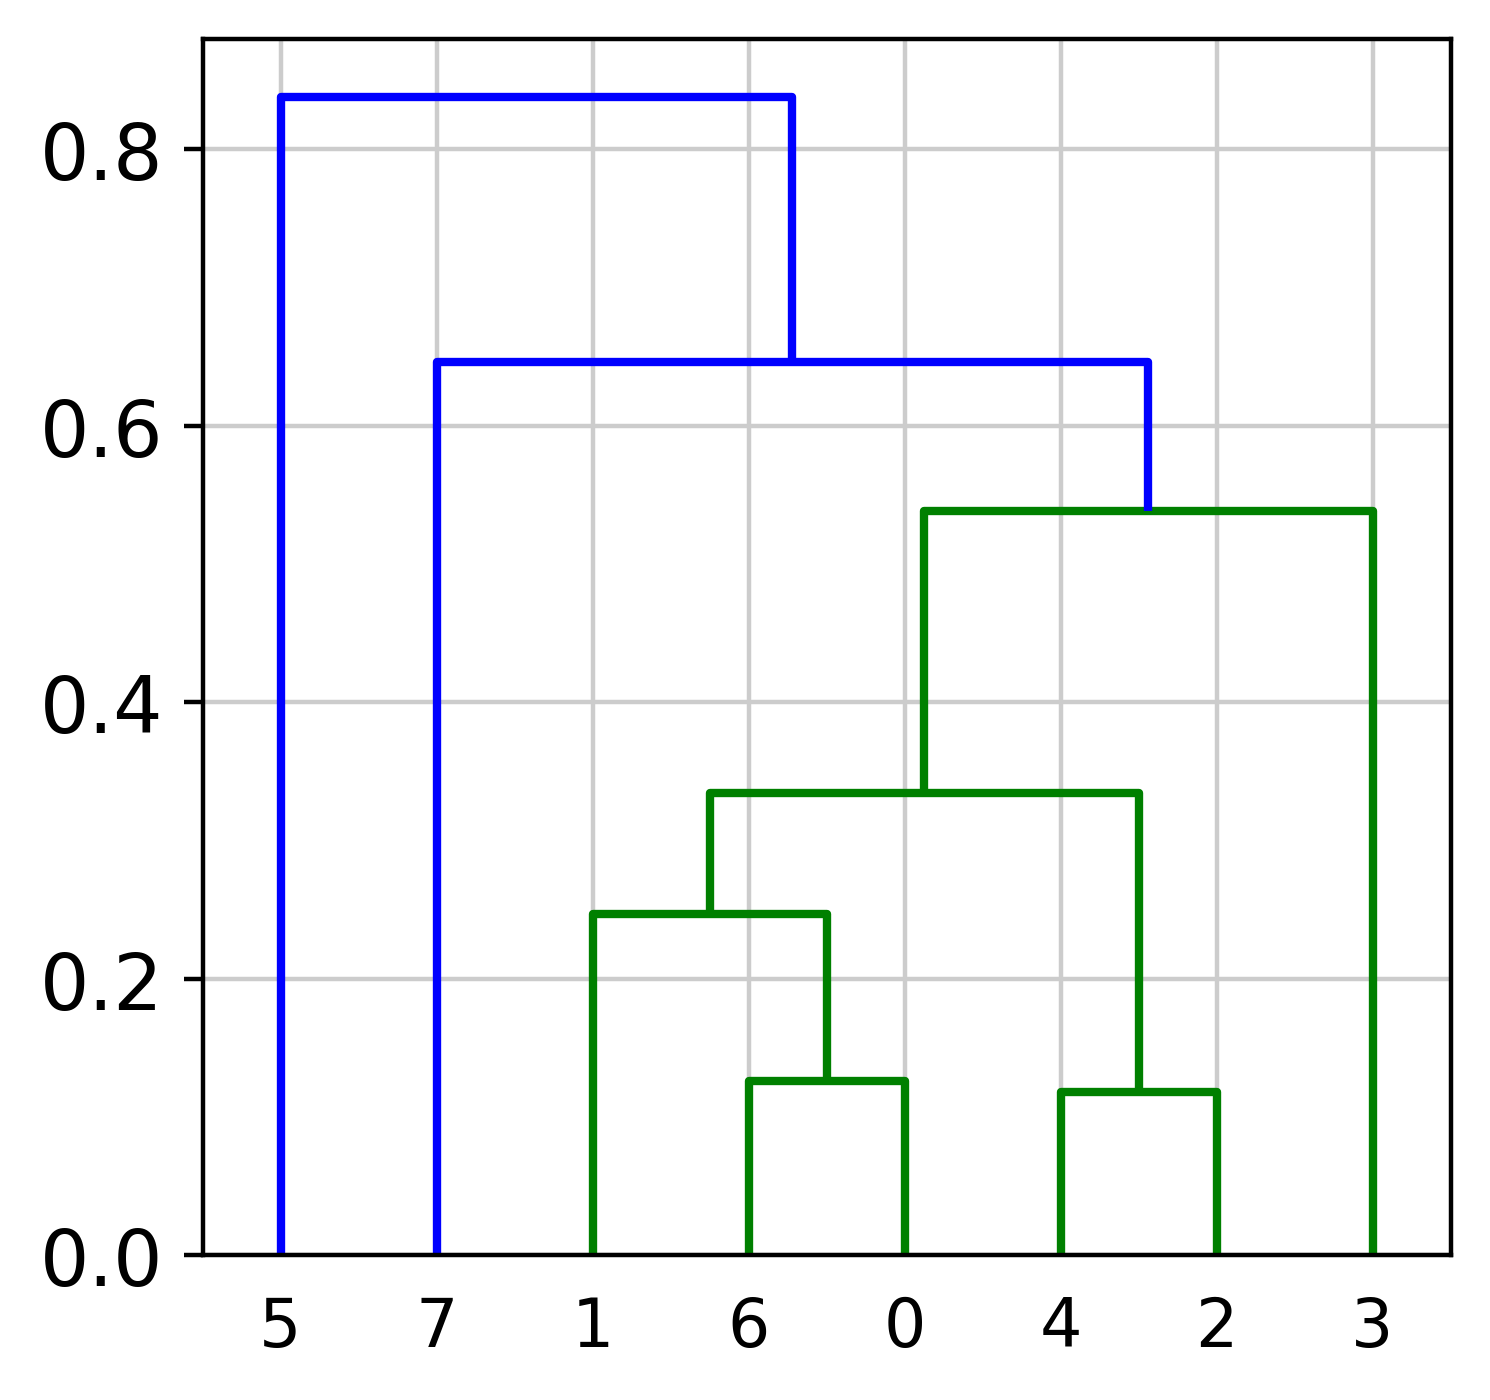

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 5 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


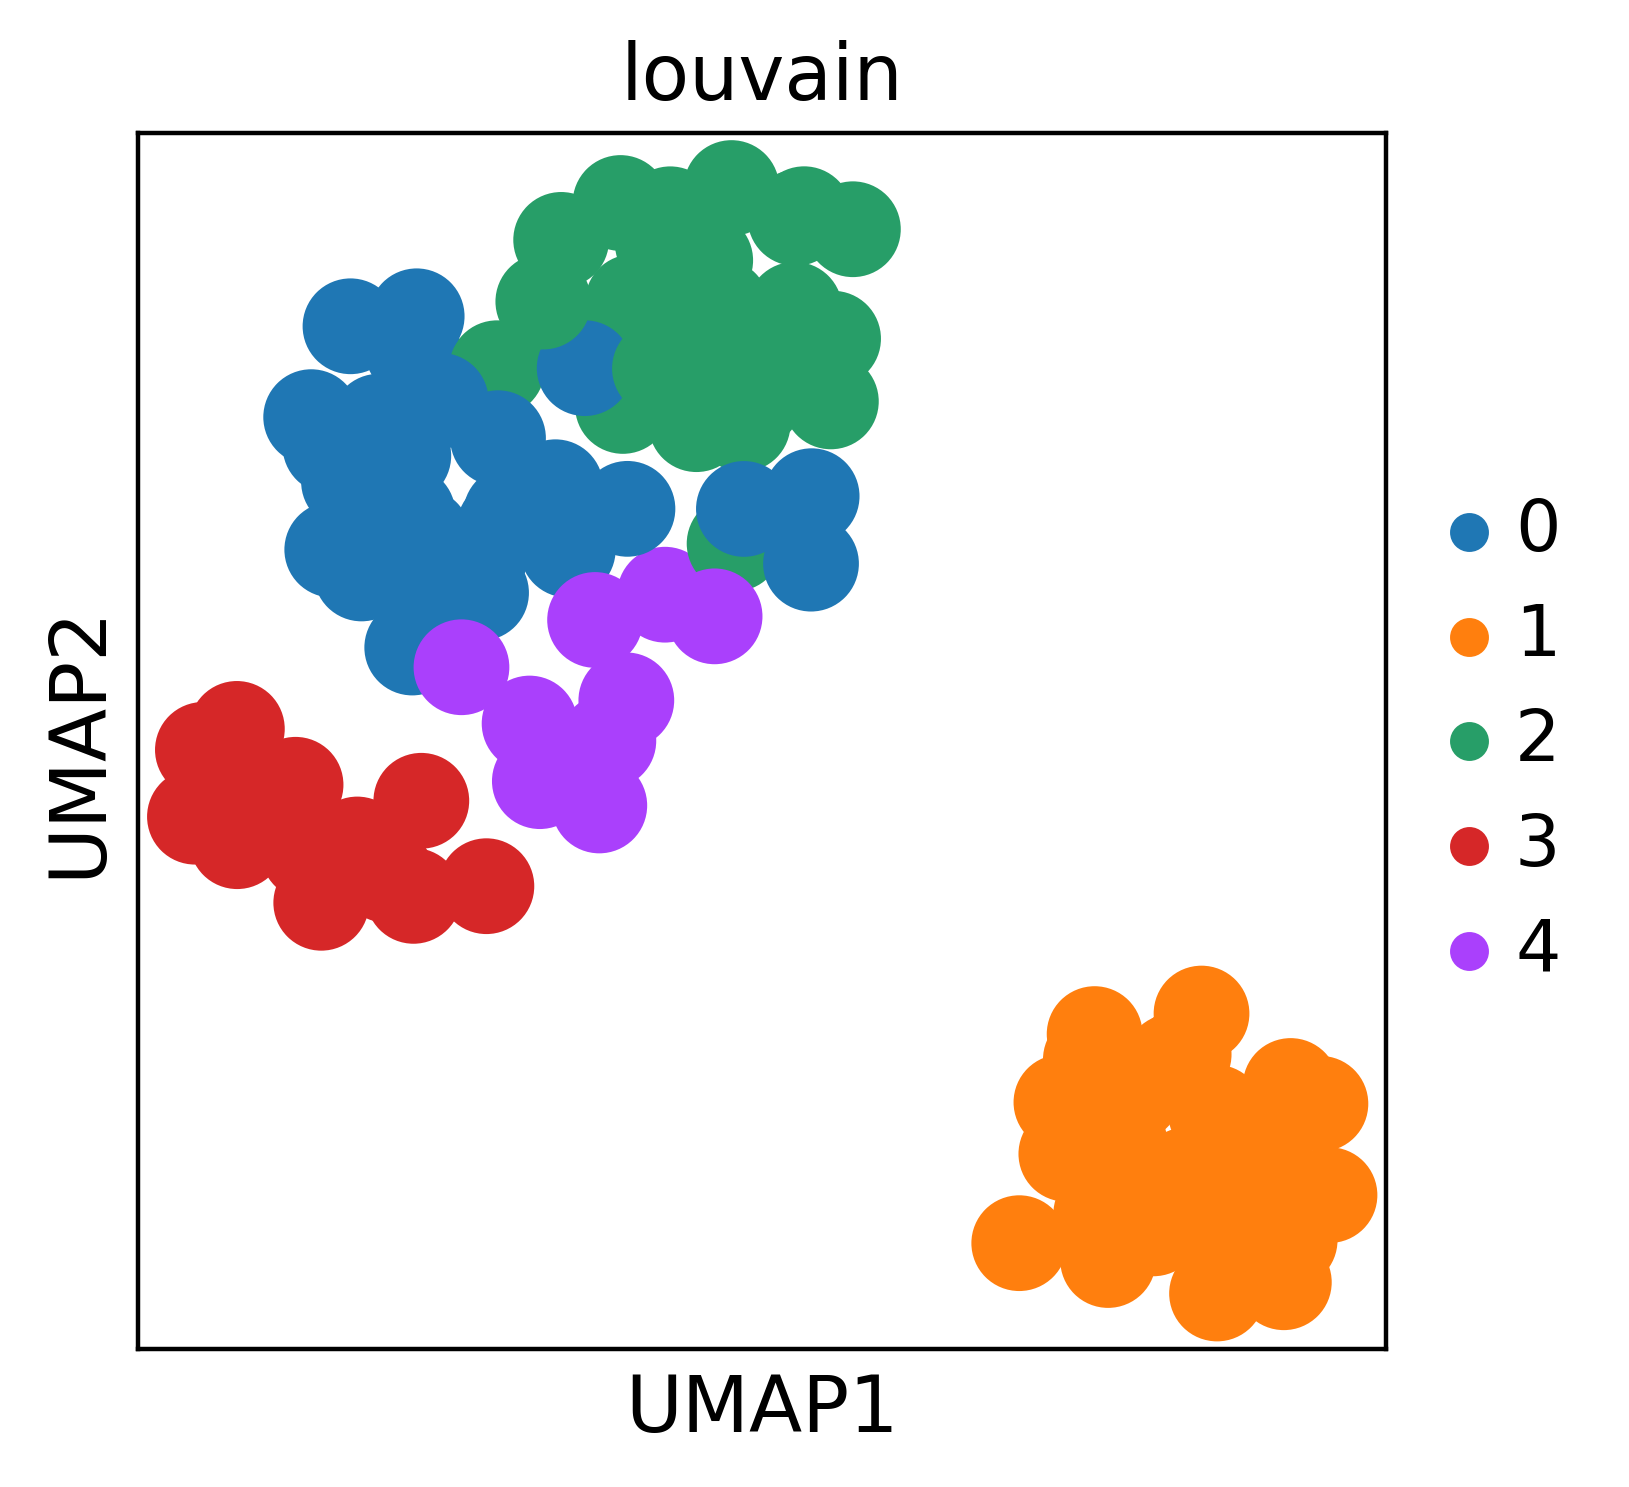

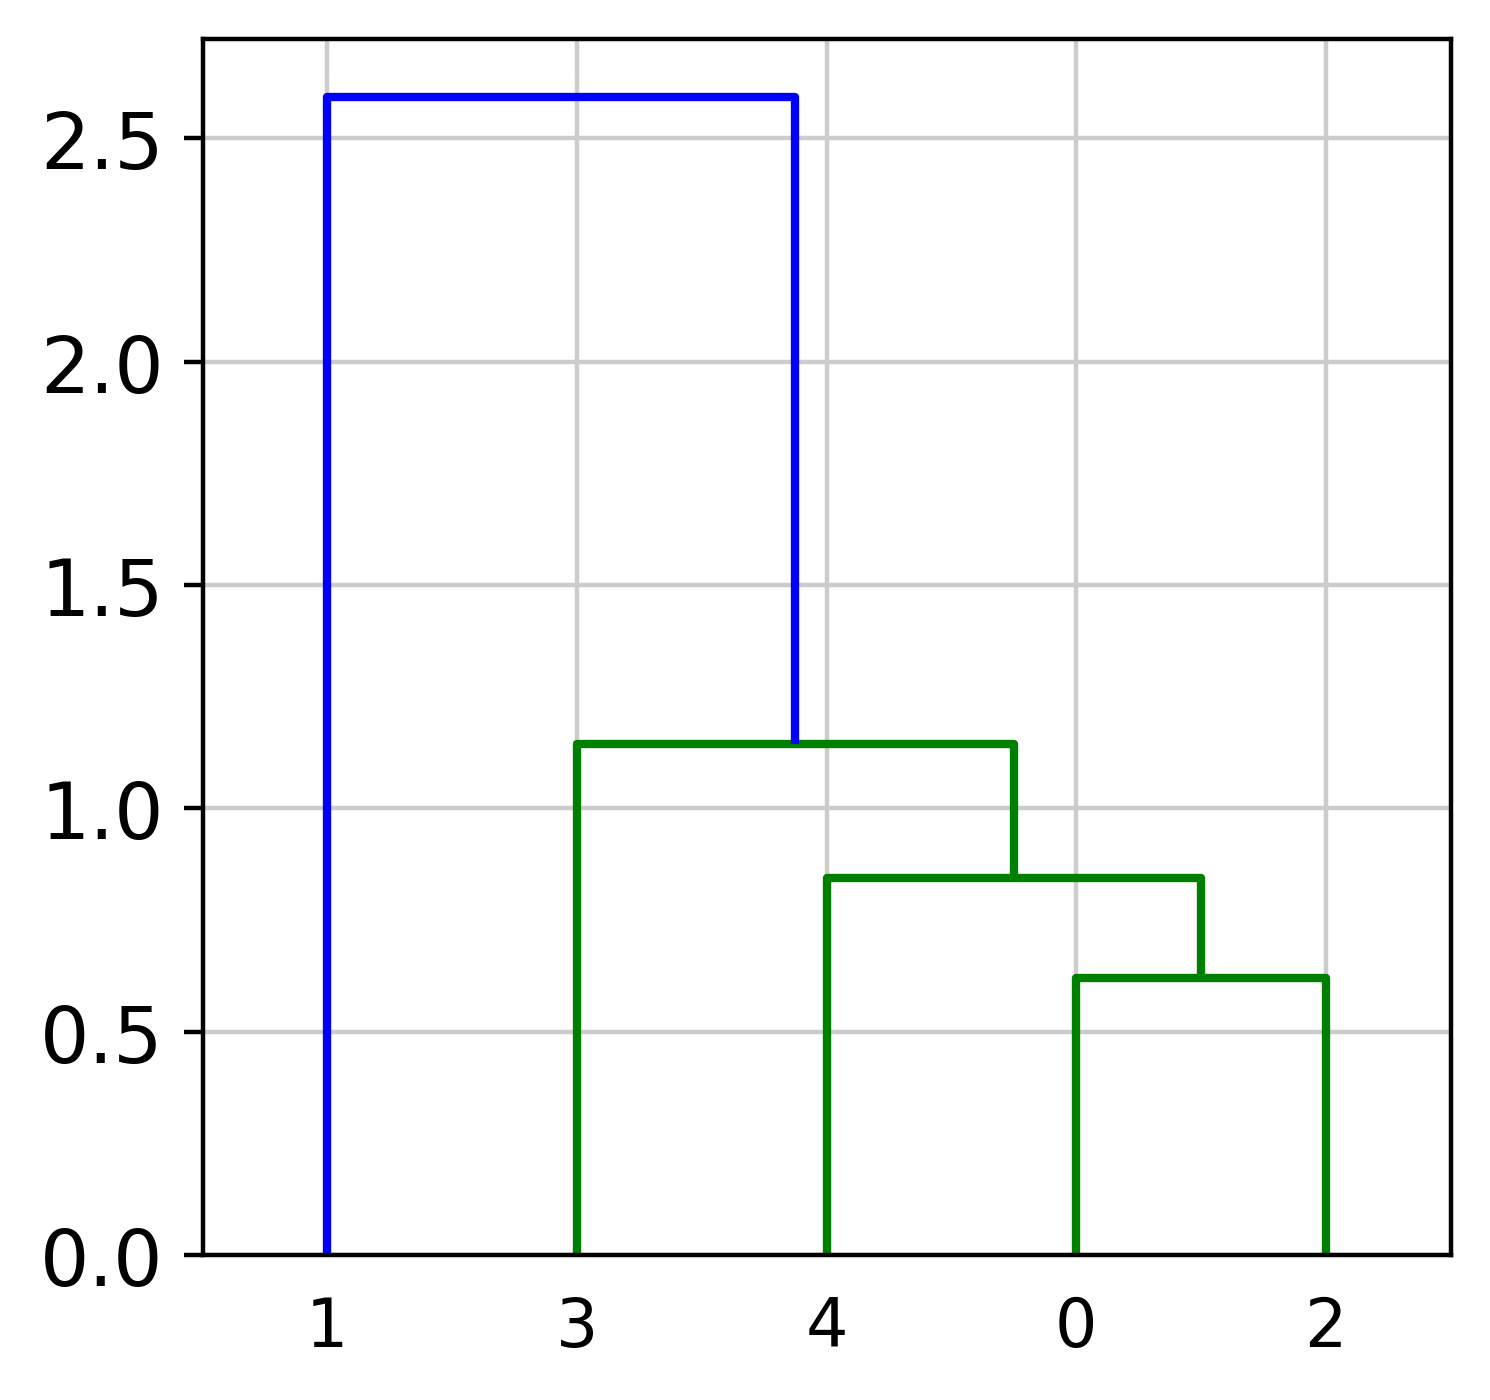

In [45]:
perturb.tl.gene_programs_and_perturbation_modules(adata_sub,input_type='bulk',
                                                  perturbation_name='variant',
                                                  cluster_within=False,
                                                  cmap_programs='Paired')

In [46]:
sorted_variants

['R158R',
 'T118T',
 'P153P',
 'E2E',
 'P47P',
 'Q5R',
 'P359P',
 'T170T',
 'D21D',
 'A83V',
 'P295P',
 'Y107H',
 'WT',
 'P301P',
 'L344L',
 'P47S',
 'P222P',
 'T312S',
 'S366A',
 'V216V',
 'G360V',
 'V31I',
 'E339K',
 'P36P',
 'P58R',
 'R337C',
 'R337L',
 'unassigned',
 'R213Q',
 'P152L',
 'S241C',
 'R273H',
 'R273L',
 'R273C',
 'C277F',
 'R280K',
 'K132R',
 'R158H',
 'M246V',
 'M237I',
 'G154V',
 'Y220C',
 'Y236C',
 'Y234C',
 'G266E',
 'R158L',
 'V272L',
 'E271K',
 'A159V',
 'C242F',
 'Y163C',
 'Y205C',
 'R280T',
 'S241F',
 'R248W',
 'R248L',
 'H179R',
 'G245C',
 'K132N',
 'V216M',
 'C238F',
 'G105C',
 'E285K',
 'G266V',
 'A159P',
 'G245S',
 'P278L',
 'C238Y',
 'R249S',
 'V173L',
 'V157F',
 'C176Y',
 'P250L',
 'R282W',
 'H193R',
 'S127F',
 'R110L',
 'H193Y',
 'H214R',
 'V272M',
 'C141Y',
 'C135Y',
 'G245V',
 'C176F',
 'L194R',
 'R249M',
 'C275Y',
 'C135F',
 'G266R',
 'H193L',
 'P151S',
 'R175H',
 'H179Y',
 'P278S',
 'G244C',
 'I195T',
 'E286K',
 'V173M',
 'G245D',
 'C275F']

In [47]:
sc_bulk=adata_sub.uns['bulk.variant'].T.loc[adata_sub.var_names,sorted_variants]
sc_bulk['module']=adata_sub.var['bulk.variant.program']
sc_bulk=sc_bulk.sort_values(by='module')
sc_bulk=sc_bulk.drop(columns=['module'])

In [48]:
x=0.25
sns.clustermap(sc_bulk,
               row_cluster=False,col_cluster=False,
               xticklabels=True,
               figsize=(40,16),
               cbar_pos=(0.75, 0.9, 0.15, 0.05),
                 cbar_kws={'orientation':'horizontal',
                "label": "z-score",
                'ticks':[-x,0,x]},
               cmap='bwr',vmin=-x,vmax=x,
              row_colors=adata_sub.var['bulk.variant.program_color'].astype(str),
               col_colors=anno.loc[:,'cluster_color'])

plt.savefig(FIGS+'/'+PROTEIN+'.regMat.lowMOI.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/'+PROTEIN+'.regMat.lowMOI.png',bbox_inches = "tight")

In [19]:
corr=perturb.util.corr_mat(sc_bulk.T)

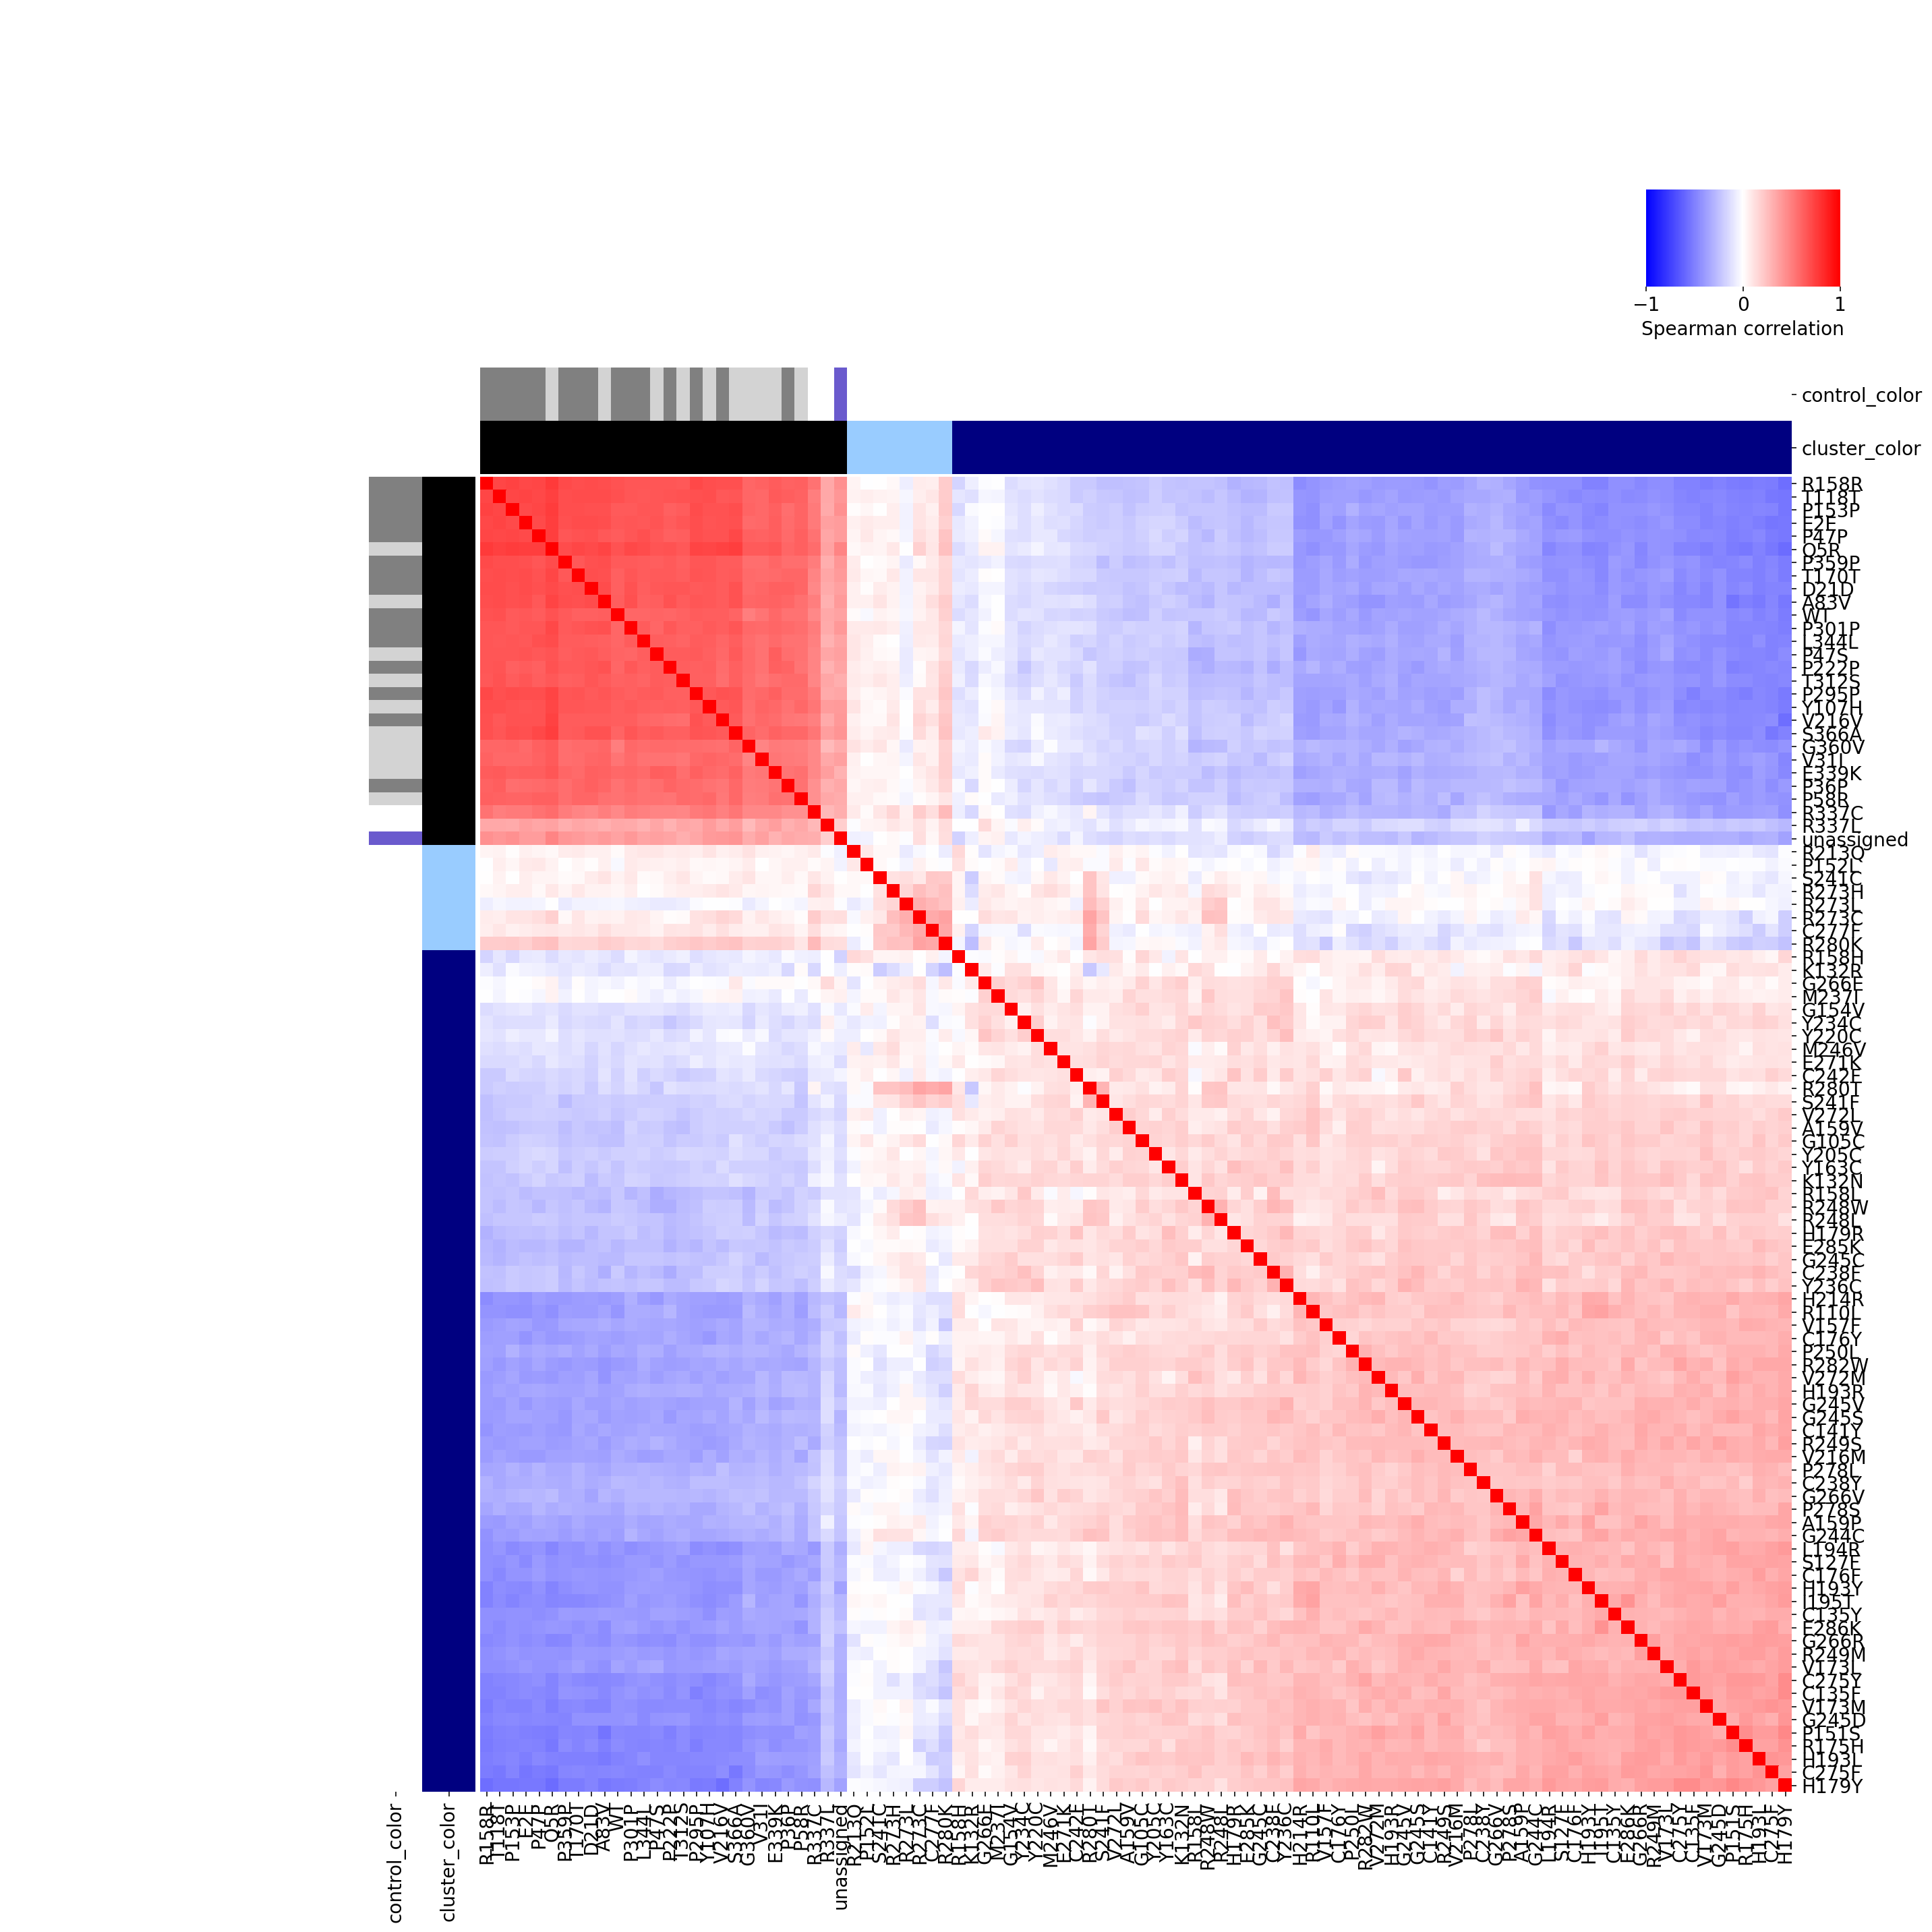

In [20]:
x=1
sns.clustermap(corr.loc[sorted_variants,sorted_variants],
               cmap='bwr',vmin=-x,vmax=x,
               col_cluster=False,row_cluster=False,
              figsize=(20,20),xticklabels=True,yticklabels=True,
               cbar_pos=(0.85, 0.85, 0.1, 0.05),
                 cbar_kws={'orientation':'horizontal',
                "label": "Spearman correlation",
                'ticks':[-x,0,x]},
              row_colors=anno.loc[:,['control_color','cluster_color']],
              col_colors=anno.loc[:,['control_color','cluster_color']])

plt.savefig(FIGS+'/'+PROTEIN+'.corrMat.lowMOI.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/'+PROTEIN+'.corrMat.lowMOI.png',bbox_inches = "tight")

In [31]:
bulk=sc.AnnData(adata_sub.uns['bulk.variant'].loc[variants,:])
bulk

AnnData object with n_obs × n_vars = 100 × 1224 

In [32]:
sc.tl.pca(bulk,n_comps=50)
sc.pp.neighbors(bulk)
sc.tl.umap(bulk)
sc.tl.louvain(bulk)

computing PCA
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 3 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


... storing 'cluster' as categorical


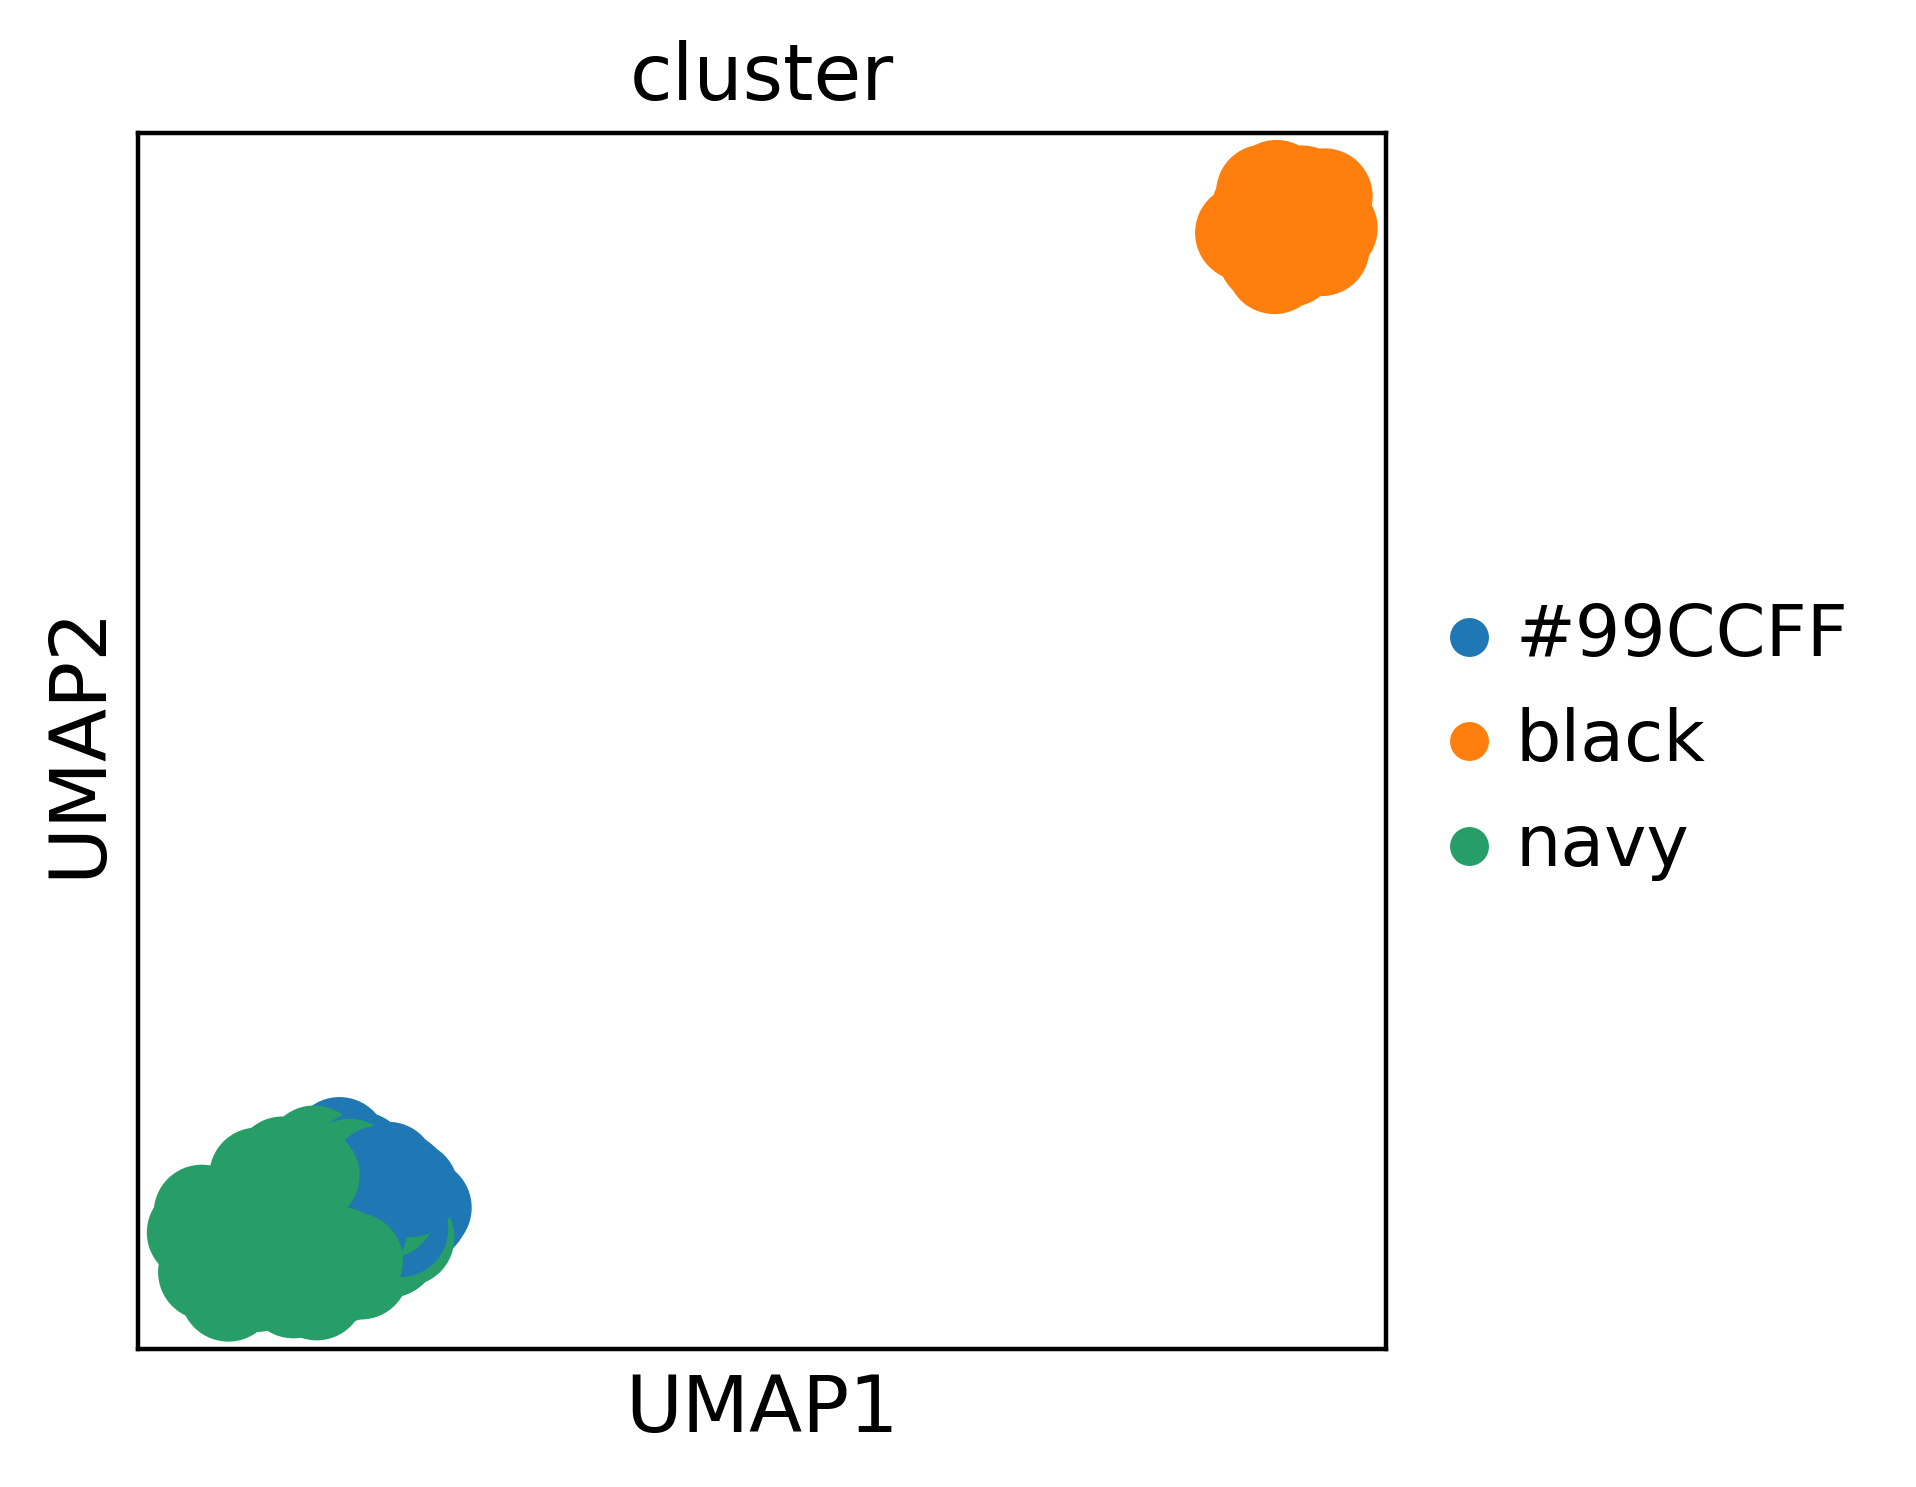

In [33]:
sc.set_figure_params(figsize=(4,4),dpi=200)
bulk.obs['cluster']=anno.loc[bulk.obs_names,'cluster_color2']
sc.pl.umap(bulk,color='cluster')

In [34]:
bulk.uns['cluster_colors']=list(bulk.obs['cluster'].cat.categories)

In [35]:
bulk.write(DATA+'/'+PROTEIN+'.bulk.lowMOI.h5ad')

In [36]:
bulk=sc.read(DATA+'/'+PROTEIN+'.bulk.lowMOI.h5ad')
bulk

Only considering the two last: ['.lowMOI', '.h5ad'].
Only considering the two last: ['.lowMOI', '.h5ad'].


AnnData object with n_obs × n_vars = 100 × 1224 
    obs: 'louvain', 'cluster'
    uns: 'cluster_colors', 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

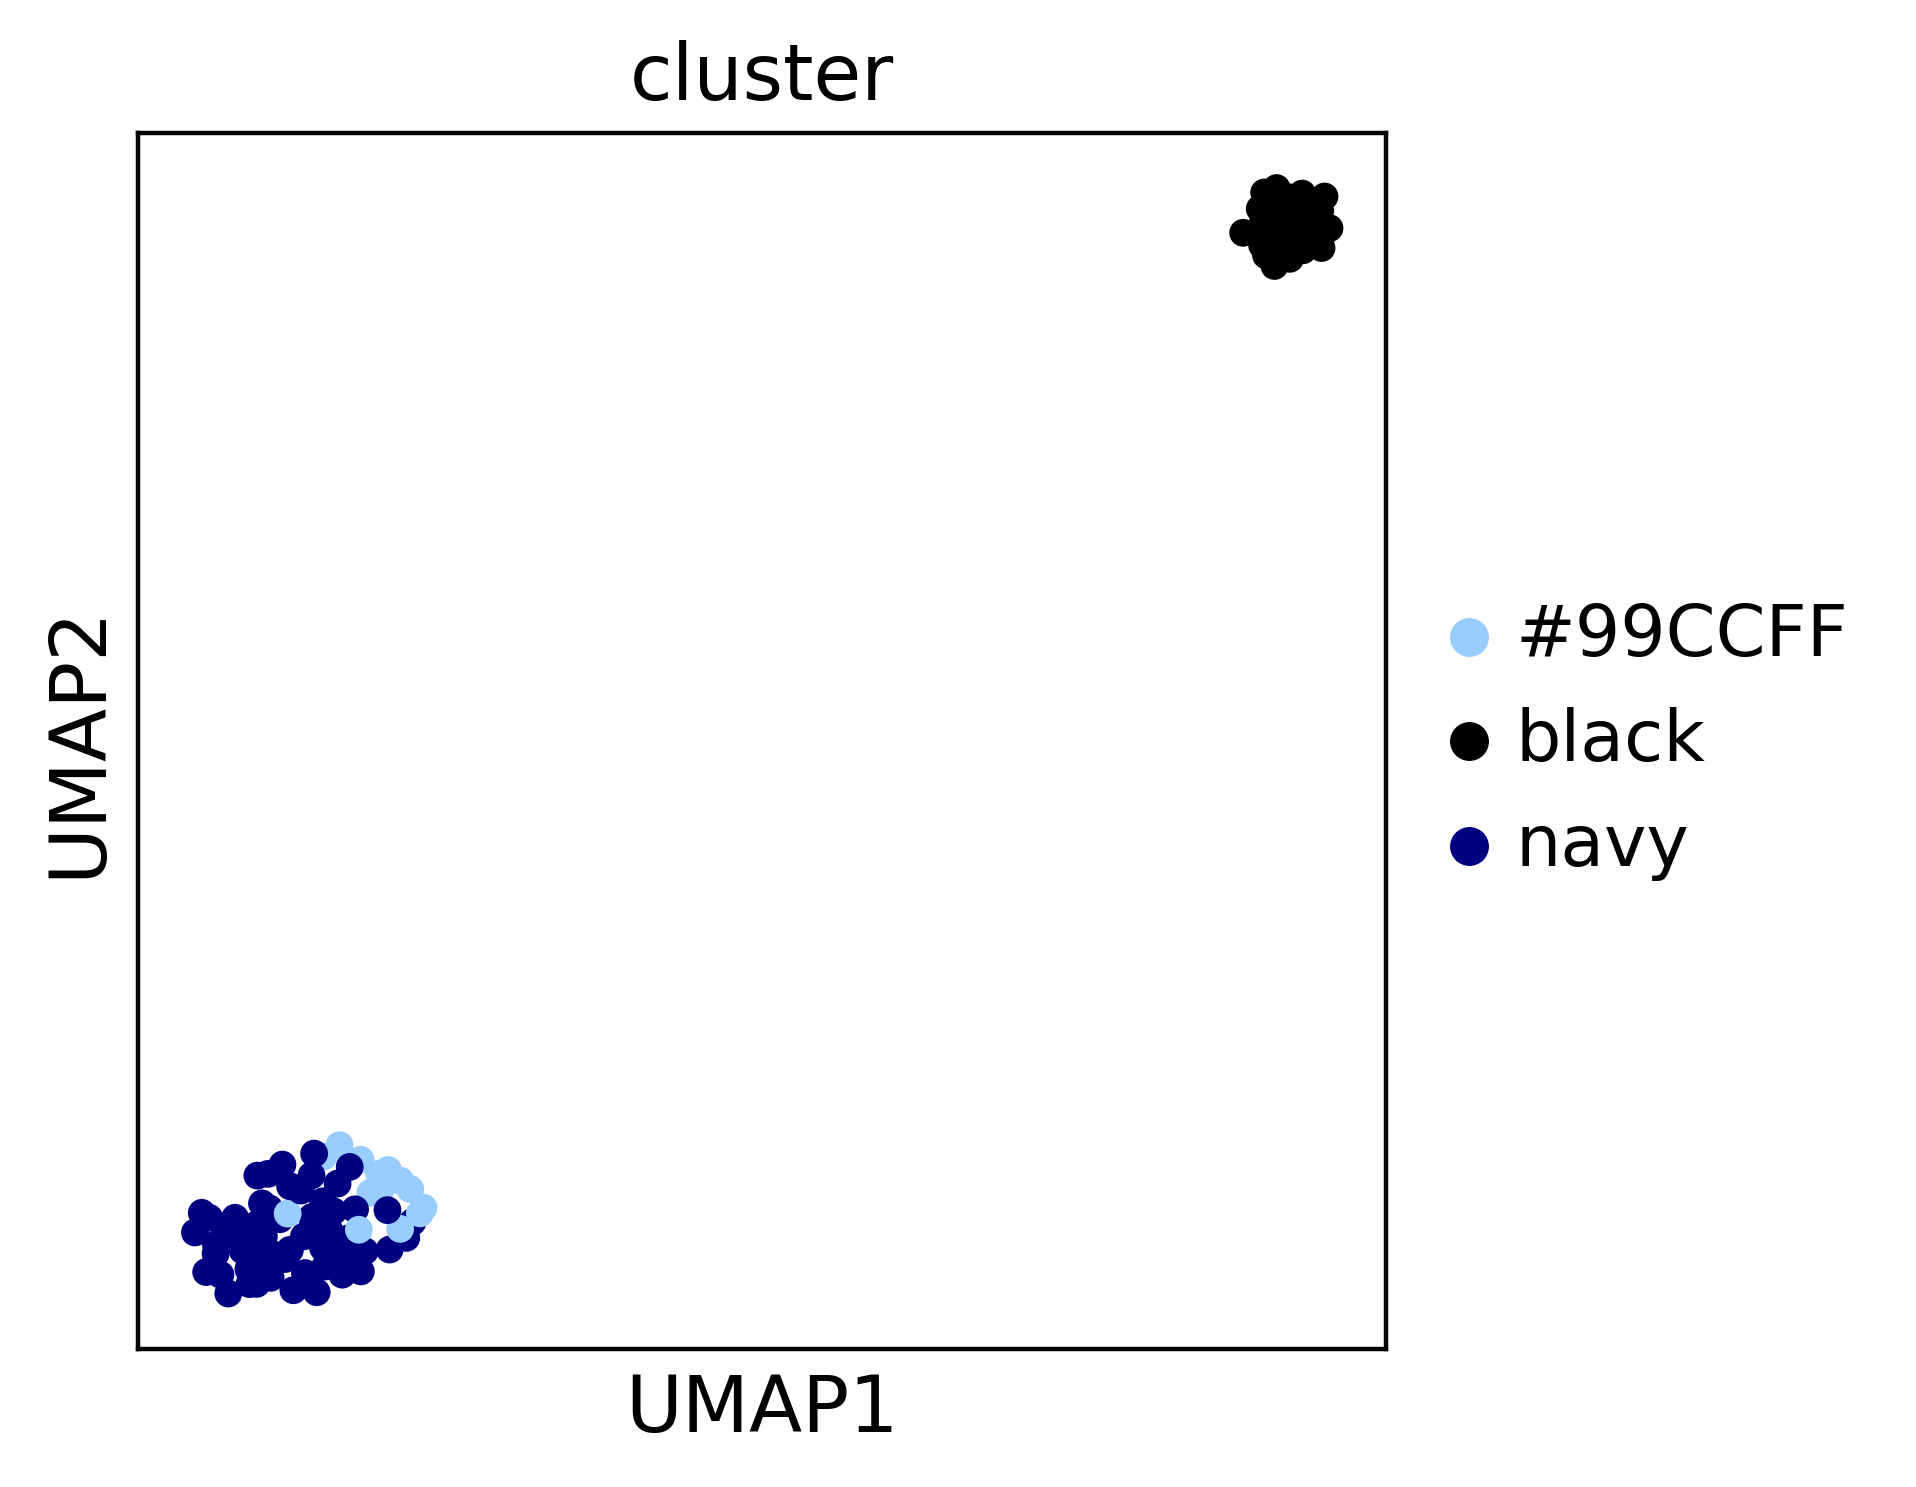

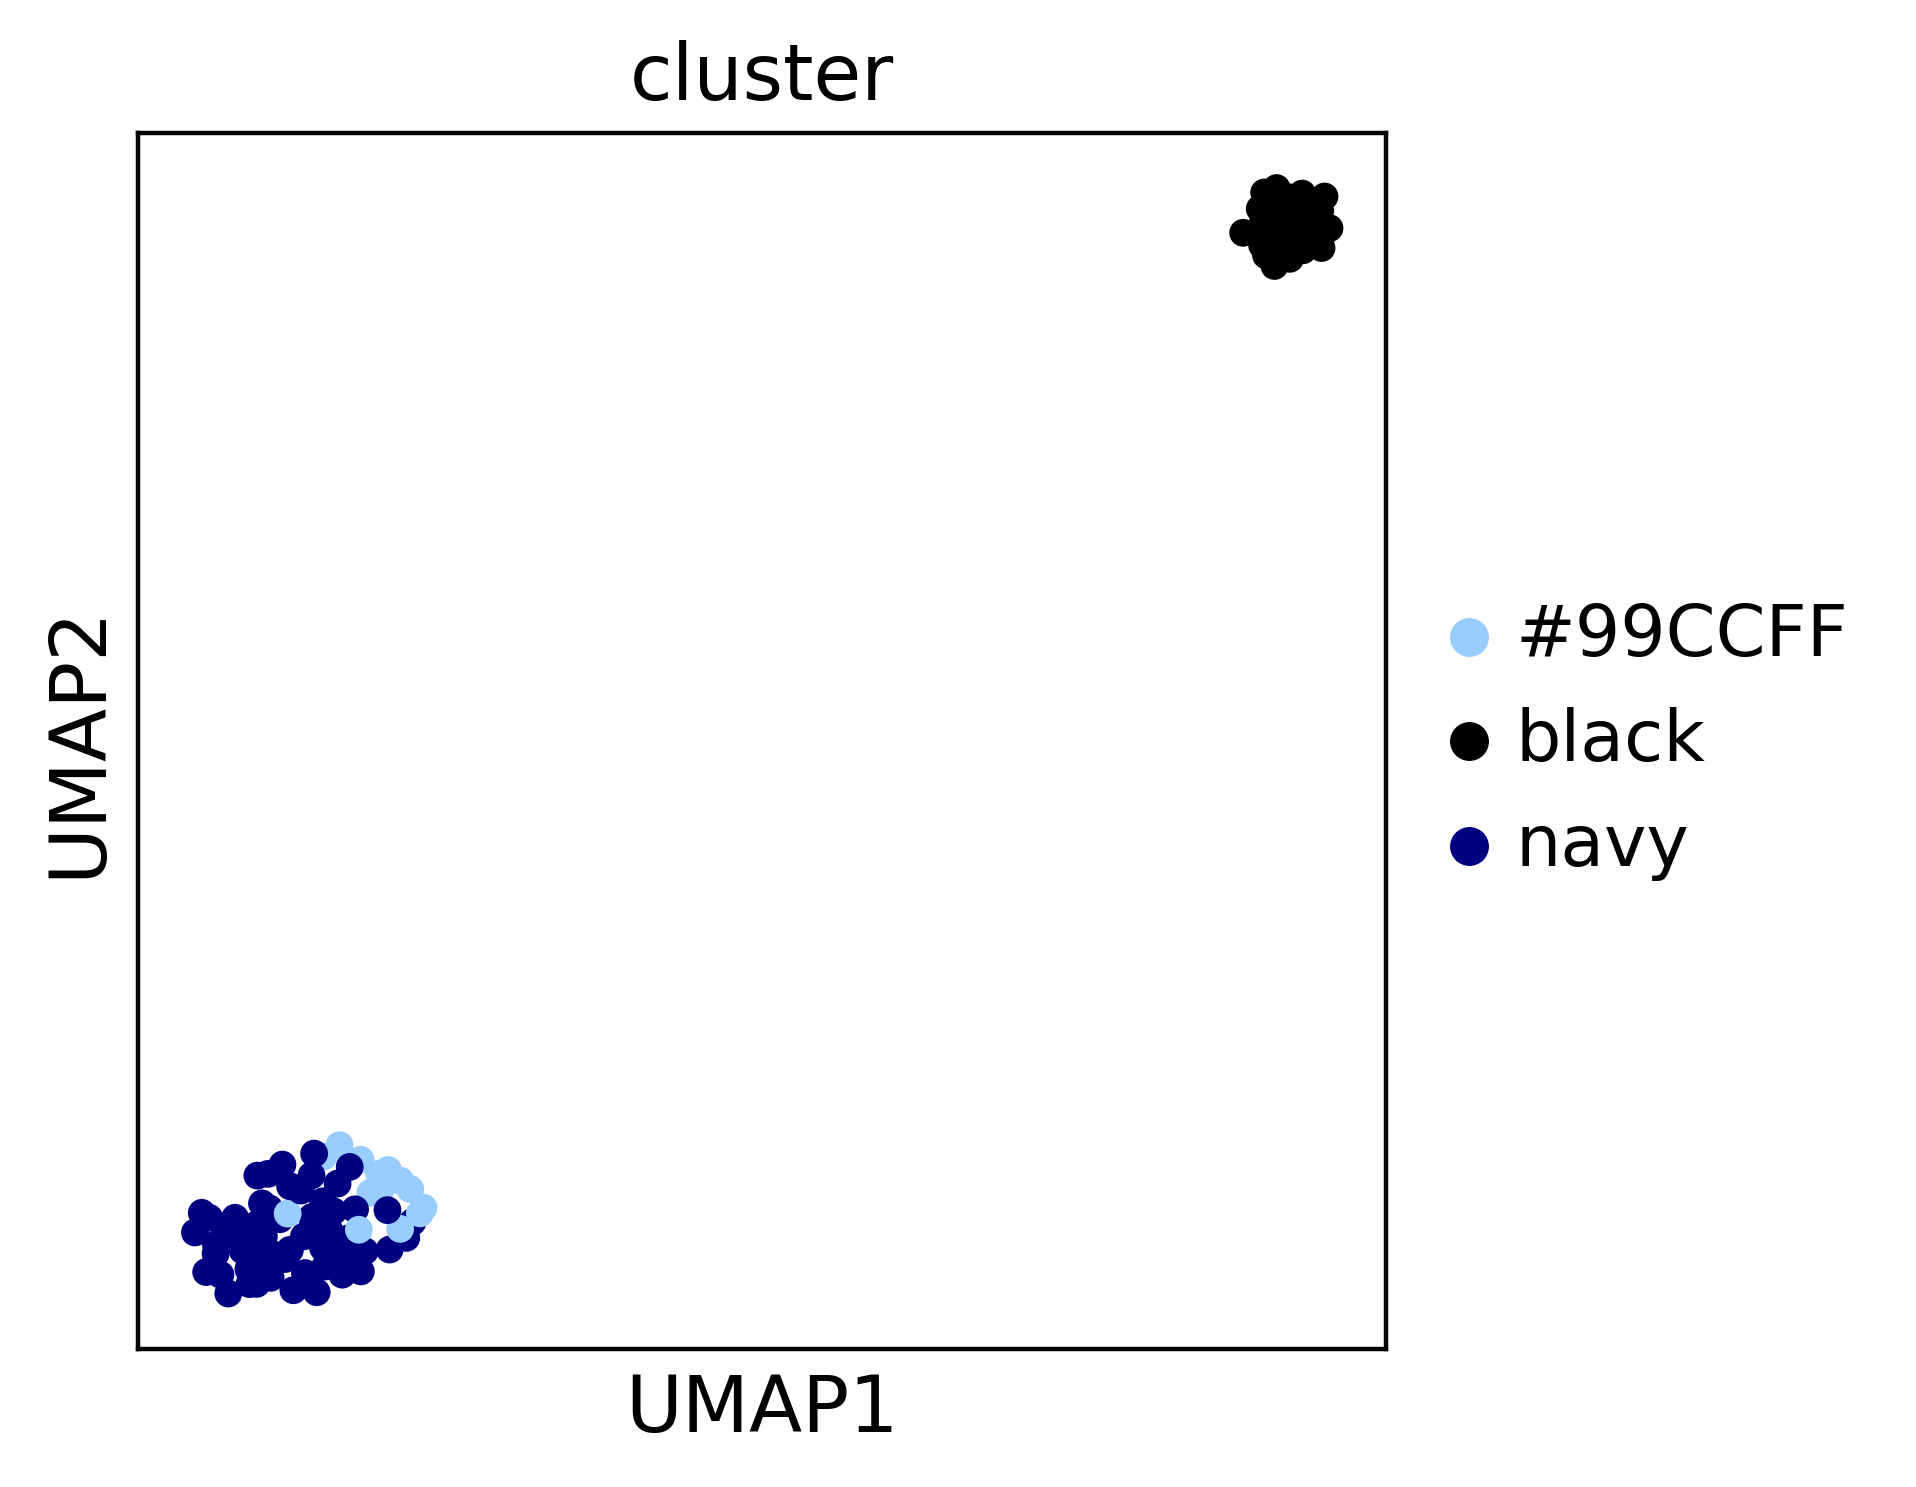

In [37]:
sc.pl.umap(bulk,color=['cluster'],
           s=100,
          save=PROTEIN+'_bulk_umap_lowMOI.png')
sc.pl.umap(bulk,color=['cluster'],
           s=100,
          save=PROTEIN+'_bulk_umap_lowMOI.pdf')

In [28]:
#setup subsampled datasets
SUBS_DIR=DATA+'/'+PROTEIN+'/scoring/subsamples_lowMOI'
os.system('mkdir -p '+SUBS_DIR)

subs_list=[1000,900,800,700,600,500,400,300,200,
           190,180,170,160,150,140,130,
    120,110,
           100,90,80,70,60,50,40,30,20,10
          ]
iters=10
for subs in subs_list:
    print(subs)
    for i in range(iters):
        #out file
        out=SUBS_DIR+'/subsample.iter'+str(i)+'.cells'+str(subs)+'.cells.csv'
        
        #subsample
        my_rng=np.random.RandomState(i)
        adata_subs=perturb.pp.subsample_cells(adata,subs,'guide.compact',
                                             rng=my_rng)
        
        #write cells
        cells=pd.DataFrame({'cells':adata_subs.obs_names})
        cells.to_csv(out,index=False,header=False)
    print(out)

1000


/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/scoring/subsamples_lowMOI/subsample.iter9.cells1000.cells.csv
900


/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/scoring/subsamples_lowMOI/subsample.iter9.cells900.cells.csv
800


/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/scoring/subsamples_lowMOI/subsample.iter9.cells800.cells.csv
700


/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/scoring/subsamples_lowMOI/subsample.iter9.cells700.cells.csv
600


/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/scoring/subsamples_lowMOI/subsample.iter9.cells600.cells.csv
500


/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/scoring/subsamples_lowMOI/subsample.iter9.cells500.cells.csv
400
/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/scoring/subsamples_lowMOI/subsample.iter9.cells400.cells.csv
300
/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/scoring/subsamples_lowMOI/subsample.iter9.cells300.cells.csv
200
/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/scoring/subsamples_lowMOI/subsample.iter9.cells200.cells.csv
190
/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/scoring/subsamples_lowMOI/subsample.iter9.cells190.cells.csv
180
/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/scoring/subsamples_lo

/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/scoring/subsamples_lowMOI/subsample.iter9.cells10.cells.csv


In [38]:
SUBS_DIR=DATA+'/'+PROTEIN+'/scoring/subsamples_lowMOI'
SCORE_DIR=DATA+'/'+PROTEIN+'/scoring/scores_lowMOI'
os.system('mkdir -p '+SCORE_DIR)

0

In [39]:
#read in the annotation file to add the clusters to it
FDR=0.01
#original anno
ANNO=DATA+'/'+PROTEIN+'/anno'
anno=pd.read_csv(ANNO+'/'+PROTEIN+'.anno.complete3.csv',sep='\t')

anno.index=anno['Variant']

anno['Position']=anno['Position'].astype('Int32')
anno['Count_pancan']=anno['Count_pancan'].astype('Int32')
anno['Count_ExAC']=anno['Count_ExAC'].astype('Int32')

variants=sorted_variants
syn=list(set(anno.loc[anno['control_status']=='synonymous','Variant']).intersection(set(variants)))
print(syn)
impactful=list(set(list(anno.loc[anno['control_status']=='unknown',:].index)).intersection(set(variants)))
print(len(impactful))


['T170T', 'P47P', 'R158R', 'V216V', 'P359P', 'D21D', 'P301P', 'L344L', 'P222P', 'P36P', 'P295P', 'E2E', 'WT', 'P153P', 'T118T']
74


In [30]:
for i in range(10):
    print('========',i)
    for subs in [#1000,200,#100,500,
        50,#40,30,20,10,
        1000,#900,800,700,600,
        500,400,300,200,
                 #190,180,170,160,
        150,#140,130,120,110,
                 100,#90,80,70,60,
                
    ]:
        
        print('cells',subs)
        
        out=SUBS_DIR+'/subsample.iter'+str(i)+'.cells'+str(subs)+'.cells.csv'
        cell_ids=list(pd.read_csv(out).iloc[:,0])

        #get subsample
        adata_sub=adata[cell_ids,:].copy()
        
        #HotellingT2 ========================================
        dataset=pd.DataFrame(adata_sub.obsm['X_pca'][:,:20],
                     index=adata_sub.obs_names,
                    columns=range(20))
        labels=pd.DataFrame({'label':adata_sub.obs['guide.compact']})
        labels.index=adata_sub.obs_names
        
        #compute scores and their FDRs
        scores_hotel=sc_eVIP.score.compare_groups_with_reference(dataset,
                                  labels,
                                 variants,
                                  syn,
                                 methods=['HotellingT2'],
                                 n_bootstrap_controls=0)
        
        #correlation ==========================================
        dataset=pd.DataFrame(adata_sub.X,index=adata_sub.obs_names,
                    columns=adata_sub.var_names)

        scores_corr=sc_eVIP.score.compare_groups_with_reference(dataset,
                                          labels,
                                         variants,
                                          syn,
                                         methods=['avg.pearson'],
                                         n_bootstrap_controls=0) 
        scores_all=scores_corr
        
        for c in scores_hotel.columns:
            if c not in scores_all.columns:
                scores_all[c]=scores_hotel.loc[scores_all.index,c]

        out=SCORE_DIR+'/scores.iter'+str(i)+'.cells'+str(subs)+'.cells.csv'
        scores_all.to_csv(out)

======== 0
cells 50
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 1000
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 500
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 400
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 300
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 200
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 150
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 100
Found 15/15 controls
99 %Found 15/15 controls
99 %======== 1
cells 50
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 1000
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 500
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 400
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 300
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 200
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 150
Found 15/15 controls
99 %Found 15/15 controls
99 %cells 100
Found 15/15 controls
99 %Found 15/15 controls
99 %======== 2
cells 5

In [40]:
#get the impactful as the ones called at 1000 cells
SCORE_DIR=DATA+'/'+PROTEIN+'/scoring/scores_lowMOI'
scorefile=SCORE_DIR+'/scores.iter0.cells1000.cells.csv'
scores=pd.read_csv(scorefile,header=0,index_col=0)


In [41]:
SUBS_DIR=DATA+'/'+PROTEIN+'/scoring/subsamples_lowMOI'
SCORE_DIR=DATA+'/'+PROTEIN+'/scoring/scores_lowMOI'
os.system('mkdir -p '+SCORE_DIR)

def get_precision_recall(score_df,colname,trues,fdr):
    
    sigs=list(score_df.loc[score_df[colname]<=fdr,:].index)
    print('true',len(trues))
    recall_here=1.0*len(list(set(sigs).intersection(set(trues))))/len(list(trues))
    if len(sigs)==0:
        precision_here=0.0
    else:
        precision_here=1.0*len(list(set(sigs).intersection(set(trues))))/len(sigs)
    return(precision_here,recall_here)

res={}
outs={}
methods=['HotellingT2','avg.pearson']
for method in methods:
    res[method]=pd.DataFrame(columns=['cells','recall','FDR','FP','cluster'])


fdr_total=0.05
thestat='.q'
for i in range(2):
    print(i)
    outs[i]={}
    for subs in [#1000,200,#100,500,
        50,#40,30,20,10,
        1000,#900,800,700,600,
        500,400,300,200,
                 #190,180,170,160,
        150,#140,130,120,110,
                 100,#90,80,70,60,
    ]:
        outs[i][subs]={}
        
        out2=SCORE_DIR+'/scores.iter'+str(i)+'.cells'+str(subs)+'.cells.csv'
        scores_real2=pd.read_csv(out2,index_col=0)
        print(scores_real2.head())

        for fdr in [fdr_total]:

            for method in methods:
                
                #all variants
                #============
                #get impactful variants
                impactful=list(scores.loc[scores[method+thestat]<=fdr,:].index)
                ctrls=list(scores.loc[scores[method+thestat]>fdr,:].index)
                print(method,fdr,'impactful',len(impactful))
                
                pre,rec=get_precision_recall(scores_real2,
                                             method+thestat,
                                             impactful,fdr)
                res_here=pd.DataFrame({'cells':subs,
                                      'recall':rec,
                                      'FDR':fdr,
                                       'cluster':'all',
                                      'FP':1.0-pre},
                                      index=[str(subs)+'.'+str(fdr)+'.'+str(i)])
                res[method]=pd.concat([res[method],res_here])
                
                
                #now, go through each cluster of variants and compute (vs original ctrls)
                for cl in ['navy','#99CCFF']:
                    print(method,cl,subs)
                    cl_variants=list(anno.loc[anno['cluster_color']==cl,:].index)
                    #print('cl variants',len(cl_variants))
                    #print('ctrls',len(ctrls))
                    cl_variants_sig=list(set(cl_variants).intersection(set(impactful)))
                    variants_here=list(set(cl_variants).union(set(ctrls)))
                    print('variants here',len(variants_here))
                    pre,rec=get_precision_recall(scores_real2.loc[variants_here,:],
                                             method+thestat,
                                             cl_variants_sig,
                                                 fdr)
                    res_here=pd.DataFrame({'cells':subs,
                                      'recall':rec,
                                      'FDR':fdr,
                                       'cluster':cl,
                                      'FP':1.0-pre},
                                      index=[str(subs)+'.'+str(fdr)+'.'+str(i)+'.cl'+cl])
                    print('---')
                    #print('sigs',len(cl_variants_sig))
                    #print('cl',len(cl_variants))
                    #print('ctrls',len(ctrls))
                    #print('fp',1-pre)
                    #print('====')
                    res[method]=pd.concat([res[method],res_here])

0
       avg.pearson.mean  avg.pearson.ci.0.95.low  avg.pearson.ci.0.95.high  \
WT             0.825082                 0.763656                  0.886509   
E285K          1.055659                 1.039936                  1.071382   
G245S          1.083067                 1.065387                  1.100747   
G244C          1.110170                 1.077729                  1.142612   
V216V          0.874715                 0.850903                  0.898527   

       avg.pearson.q  HotellingT2.mean  HotellingT2.ci.0.95.low  \
WT          0.668427         32.216747                25.915131   
E285K       0.119434         54.526402                48.438239   
G245S       0.084982         56.304565                48.307639   
G244C       0.084982         59.079697                52.177317   
V216V       0.573744         32.486430                27.988952   

       HotellingT2.ci.0.95.high  HotellingT2.q  
WT                    38.518363       0.545561  
E285K                 60.614

/ahg/regevdata/users/oursu/software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:62: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/ahg/regevdata/users/oursu/software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:90: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



       avg.pearson.mean  avg.pearson.ci.0.95.low  avg.pearson.ci.0.95.high  \
WT             0.378996                 0.363656                  0.394336   
E285K          1.310679                 1.297087                  1.324271   
G245S          1.277611                 1.259609                  1.295613   
G244C          1.363810                 1.342447                  1.385173   
V216V          0.444345                 0.426025                  0.462665   

       avg.pearson.q  HotellingT2.mean  HotellingT2.ci.0.95.low  \
WT          0.706391         22.902596                20.500257   
E285K       0.000010        154.897943               143.977701   
G245S       0.000010        137.848125               129.289877   
G244C       0.000010        201.651655               190.605417   
V216V       0.358812         27.088474                23.681652   

       HotellingT2.ci.0.95.high  HotellingT2.q  
WT                    25.304934       0.553478  
E285K                165.81818

       avg.pearson.mean  avg.pearson.ci.0.95.low  avg.pearson.ci.0.95.high  \
WT             0.392030                 0.365653                  0.418407   
E285K          1.274544                 1.263986                  1.285103   
G245S          1.284180                 1.261830                  1.306531   
G244C          1.365635                 1.344534                  1.386735   
V216V          0.428568                 0.402014                  0.455123   

       avg.pearson.q  HotellingT2.mean  HotellingT2.ci.0.95.low  \
WT          0.695692         27.497698                22.700436   
E285K       0.000010        155.407513               141.833479   
G245S       0.000010        150.961696               137.855760   
G244C       0.000010        180.231987               165.648591   
V216V       0.604199         33.169049                28.150480   

       HotellingT2.ci.0.95.high  HotellingT2.q  
WT                    32.294961       0.624000  
E285K                168.98154

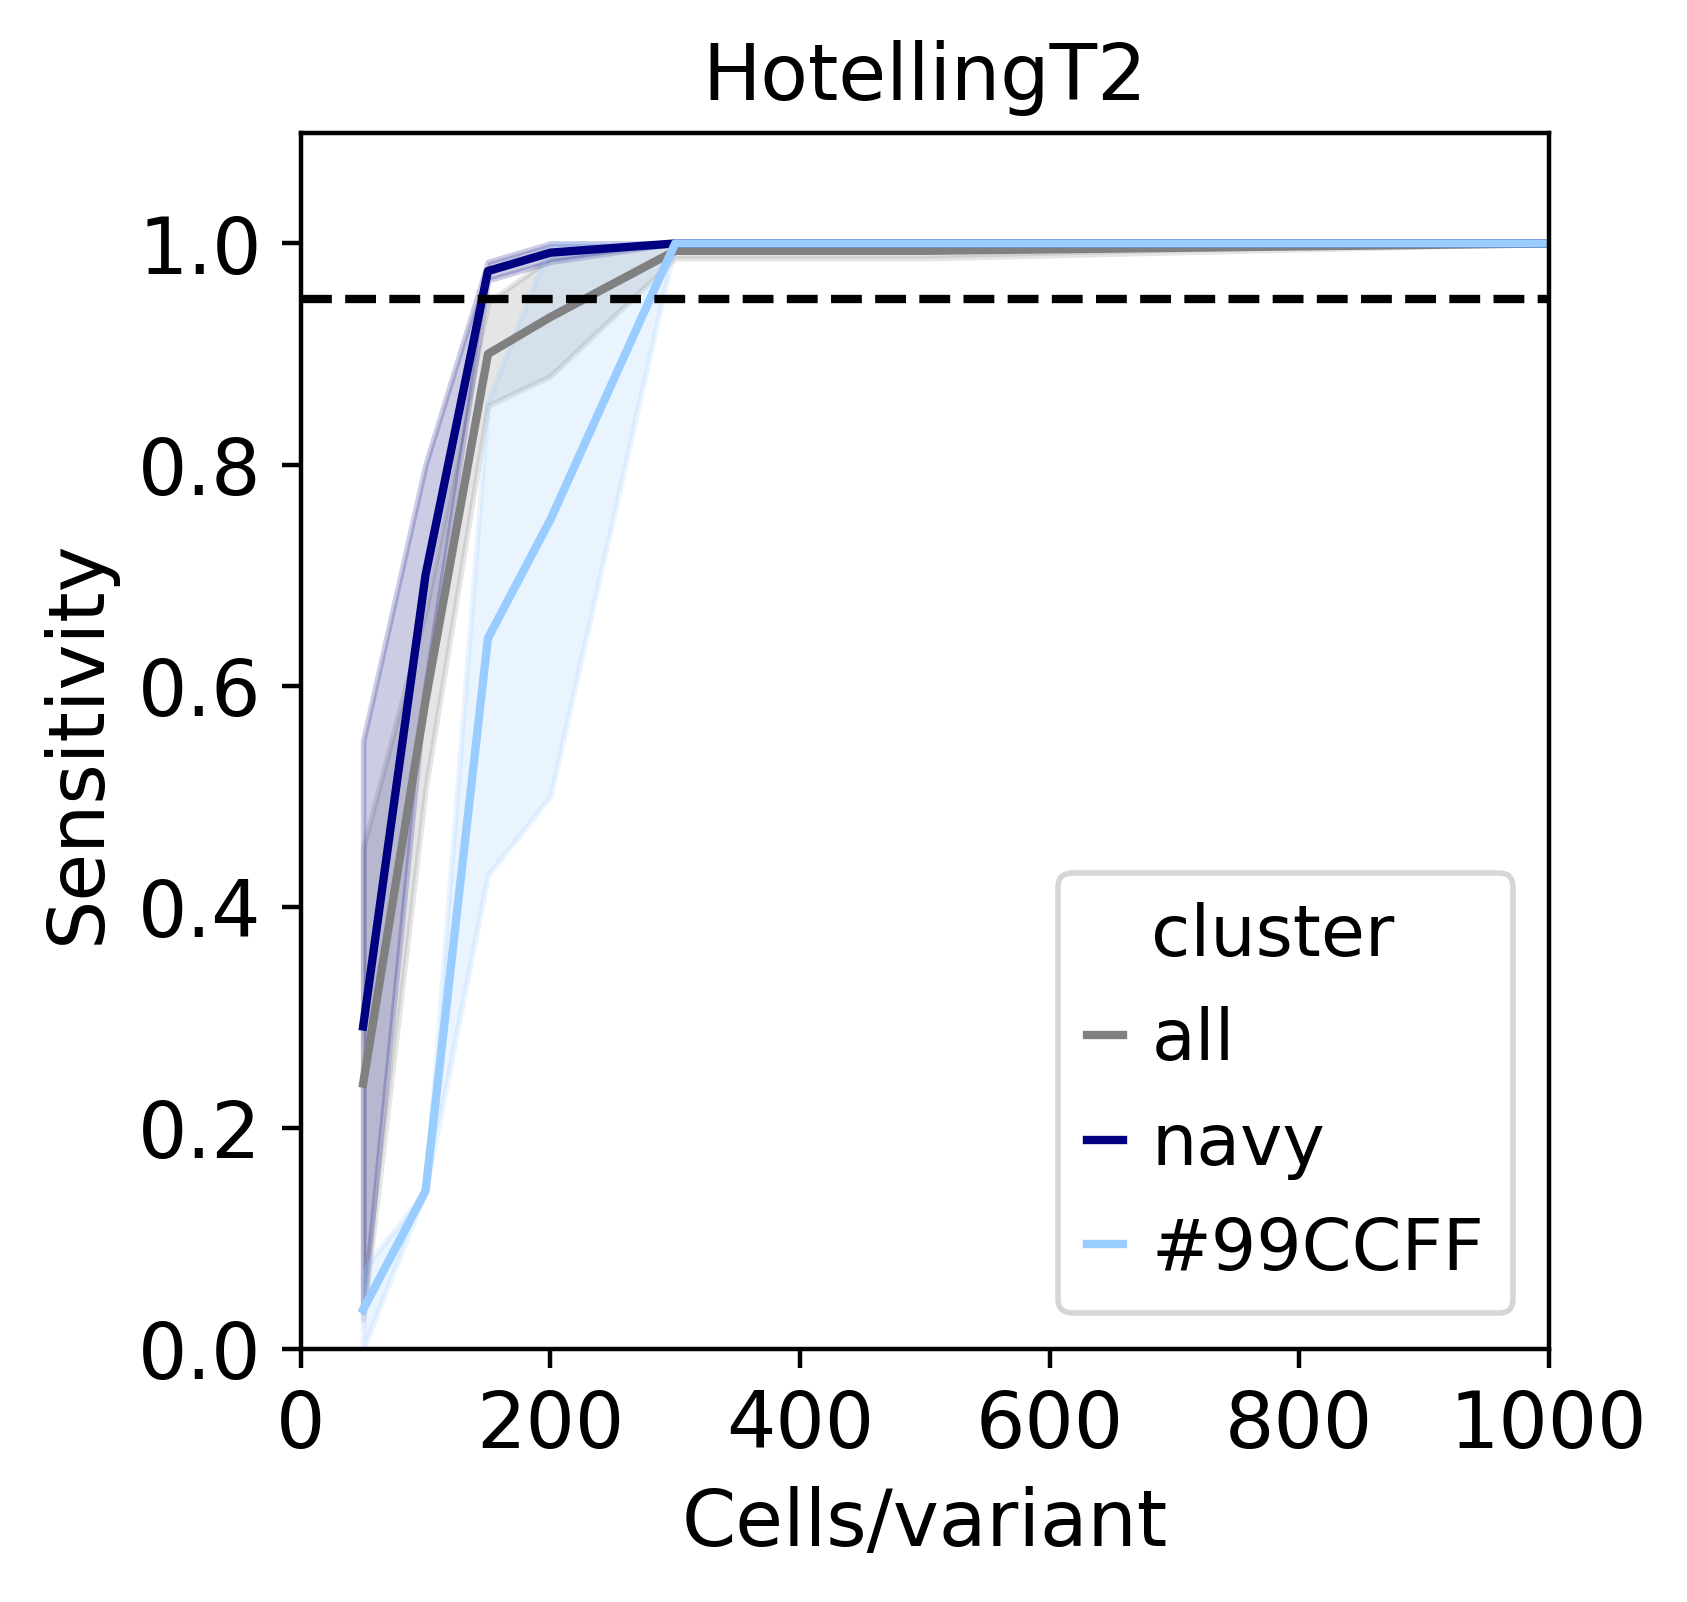

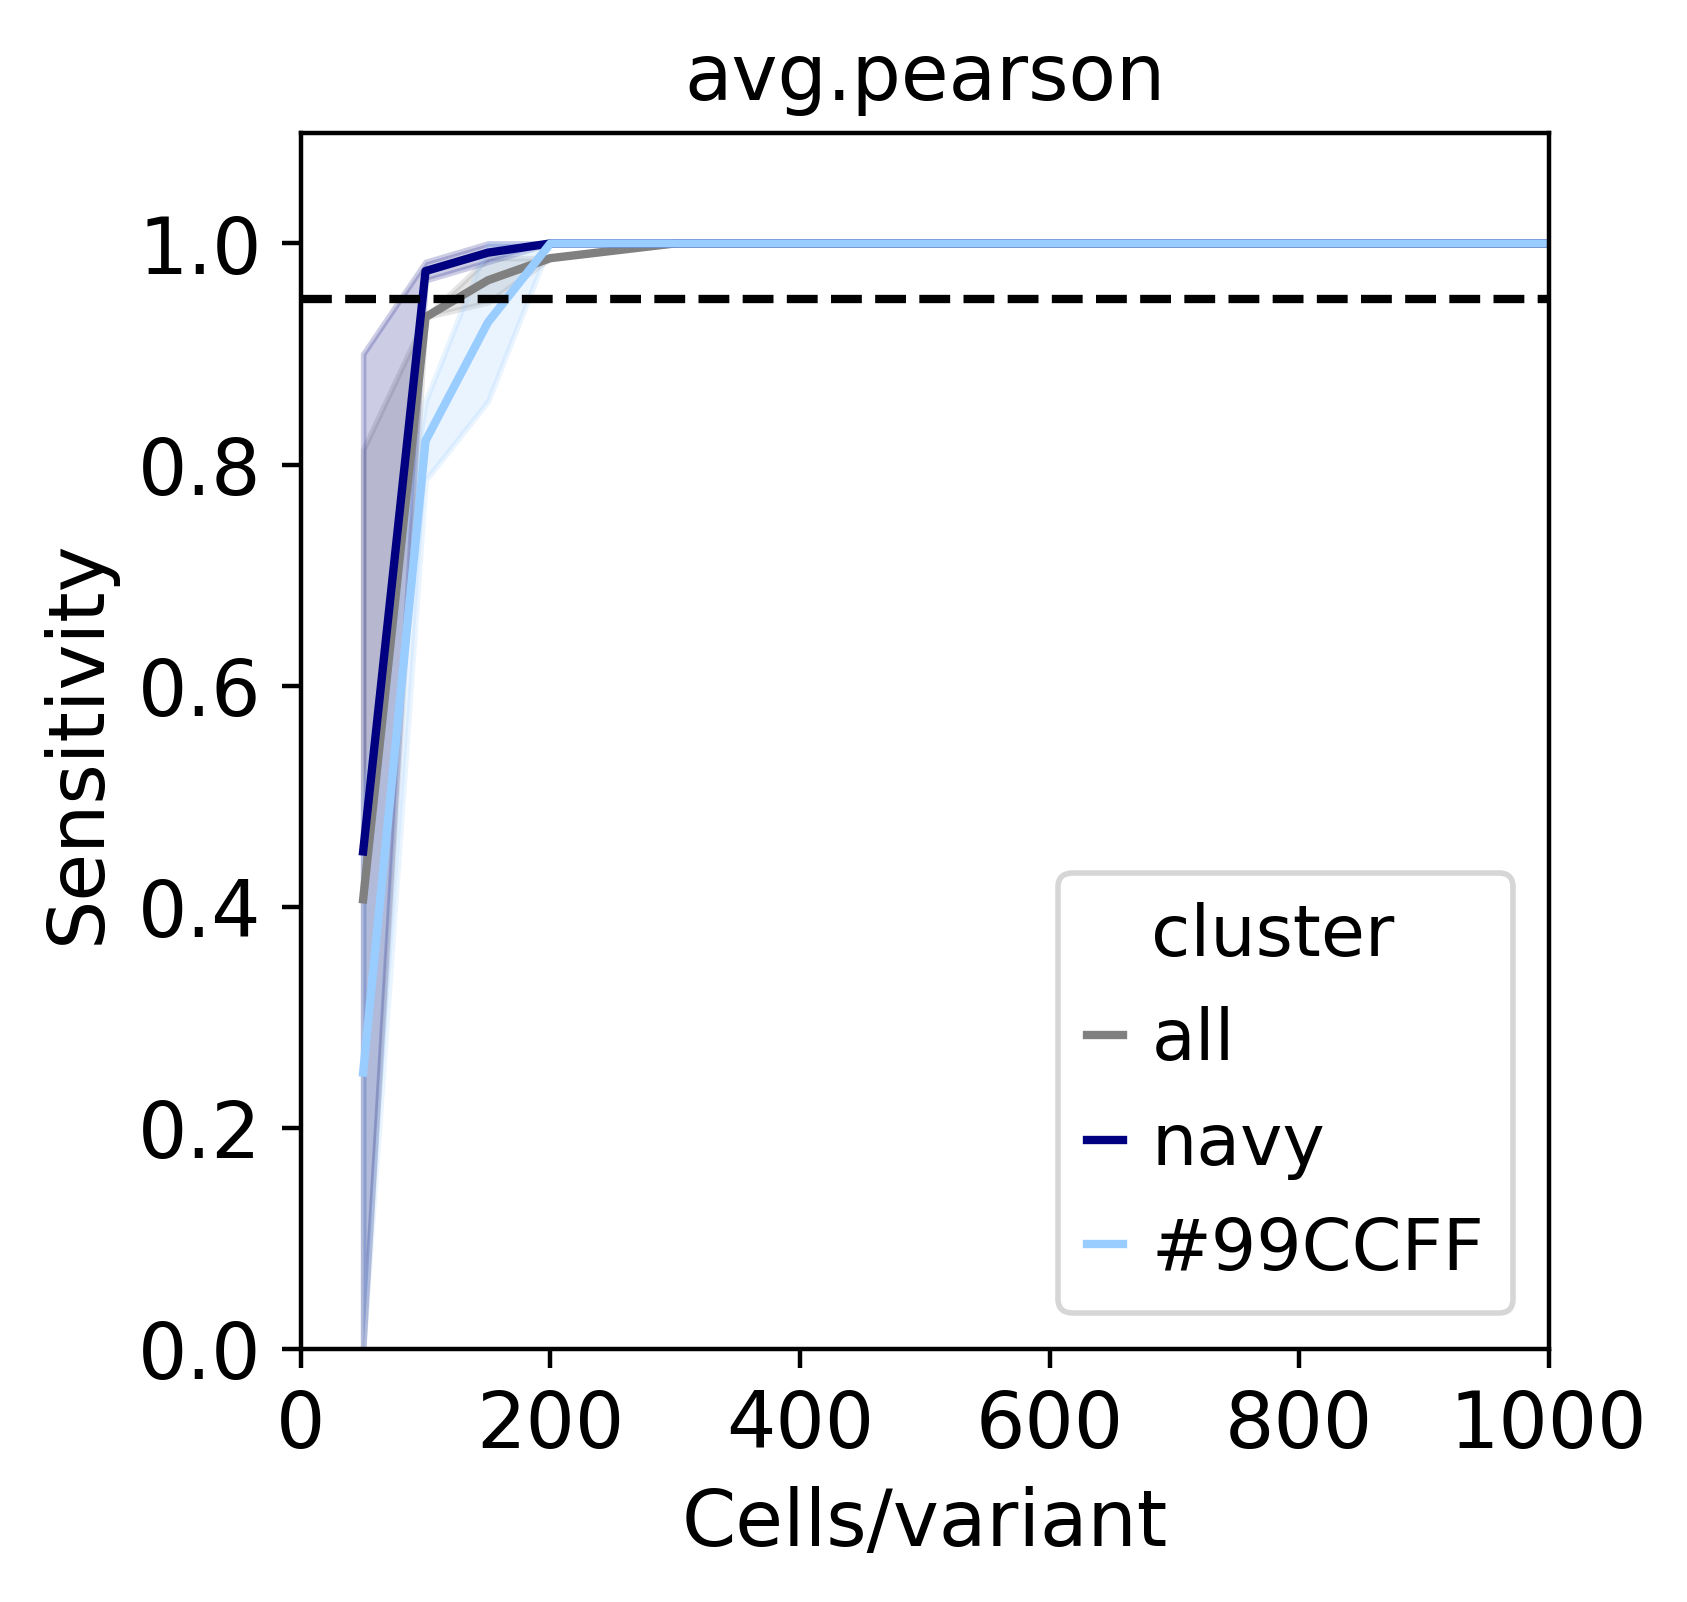

In [42]:
#how to make lines with error bars
method='HotellingT2'

palette={}
for i in ['navy','#99CCFF']:
    palette[i]=i
palette['all']='gray'
sns.lineplot(
    data=res[method].loc[res[method]['FDR']==fdr_total,:], 
    x="cells", y="recall",hue='cluster', 
    #cmap='tab20',
    #err_style="bars",
    palette=palette,
    ci=95,
)
plt.ylim(0,1.1)
plt.xlim(0,1000)
plt.axhline(y=0.95,color='black',linestyle='--')
plt.grid(False)
plt.xlabel('Cells/variant')
plt.ylabel('Sensitivity')
plt.title(method)
#plt.axvline(x=100)
#plt.axvline(x=200)
#plt.axvline(x=300)
plt.savefig(FIGS+'/RecallatFDR.'+method+'.'+PROTEIN+'.lowMOI.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/RecallatFDR.'+method+'.'+PROTEIN+'.lowMOI.png',bbox_inches = "tight")
plt.show()

#how to make lines with error bars
method='avg.pearson'

sns.lineplot(
    
    data=res[method].loc[res[method]['FDR']==fdr_total,:], 
    x="cells", y="recall",hue='cluster', 
    #cmap='tab20',
    #err_style="bars",
    palette=palette,
    ci=95,
)
plt.ylim(0,1.1)
plt.grid(False)
plt.xlim(0,1000)
plt.axhline(y=0.95,color='black',linestyle='--')
plt.xlabel('Cells/variant')
plt.ylabel('Sensitivity')
plt.title(method)
plt.savefig(FIGS+'/RecallatFDR.'+method+'.'+PROTEIN+'.lowMOI.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/RecallatFDR.'+method+'.'+PROTEIN+'.lowMOI.png',bbox_inches = "tight")
plt.show()

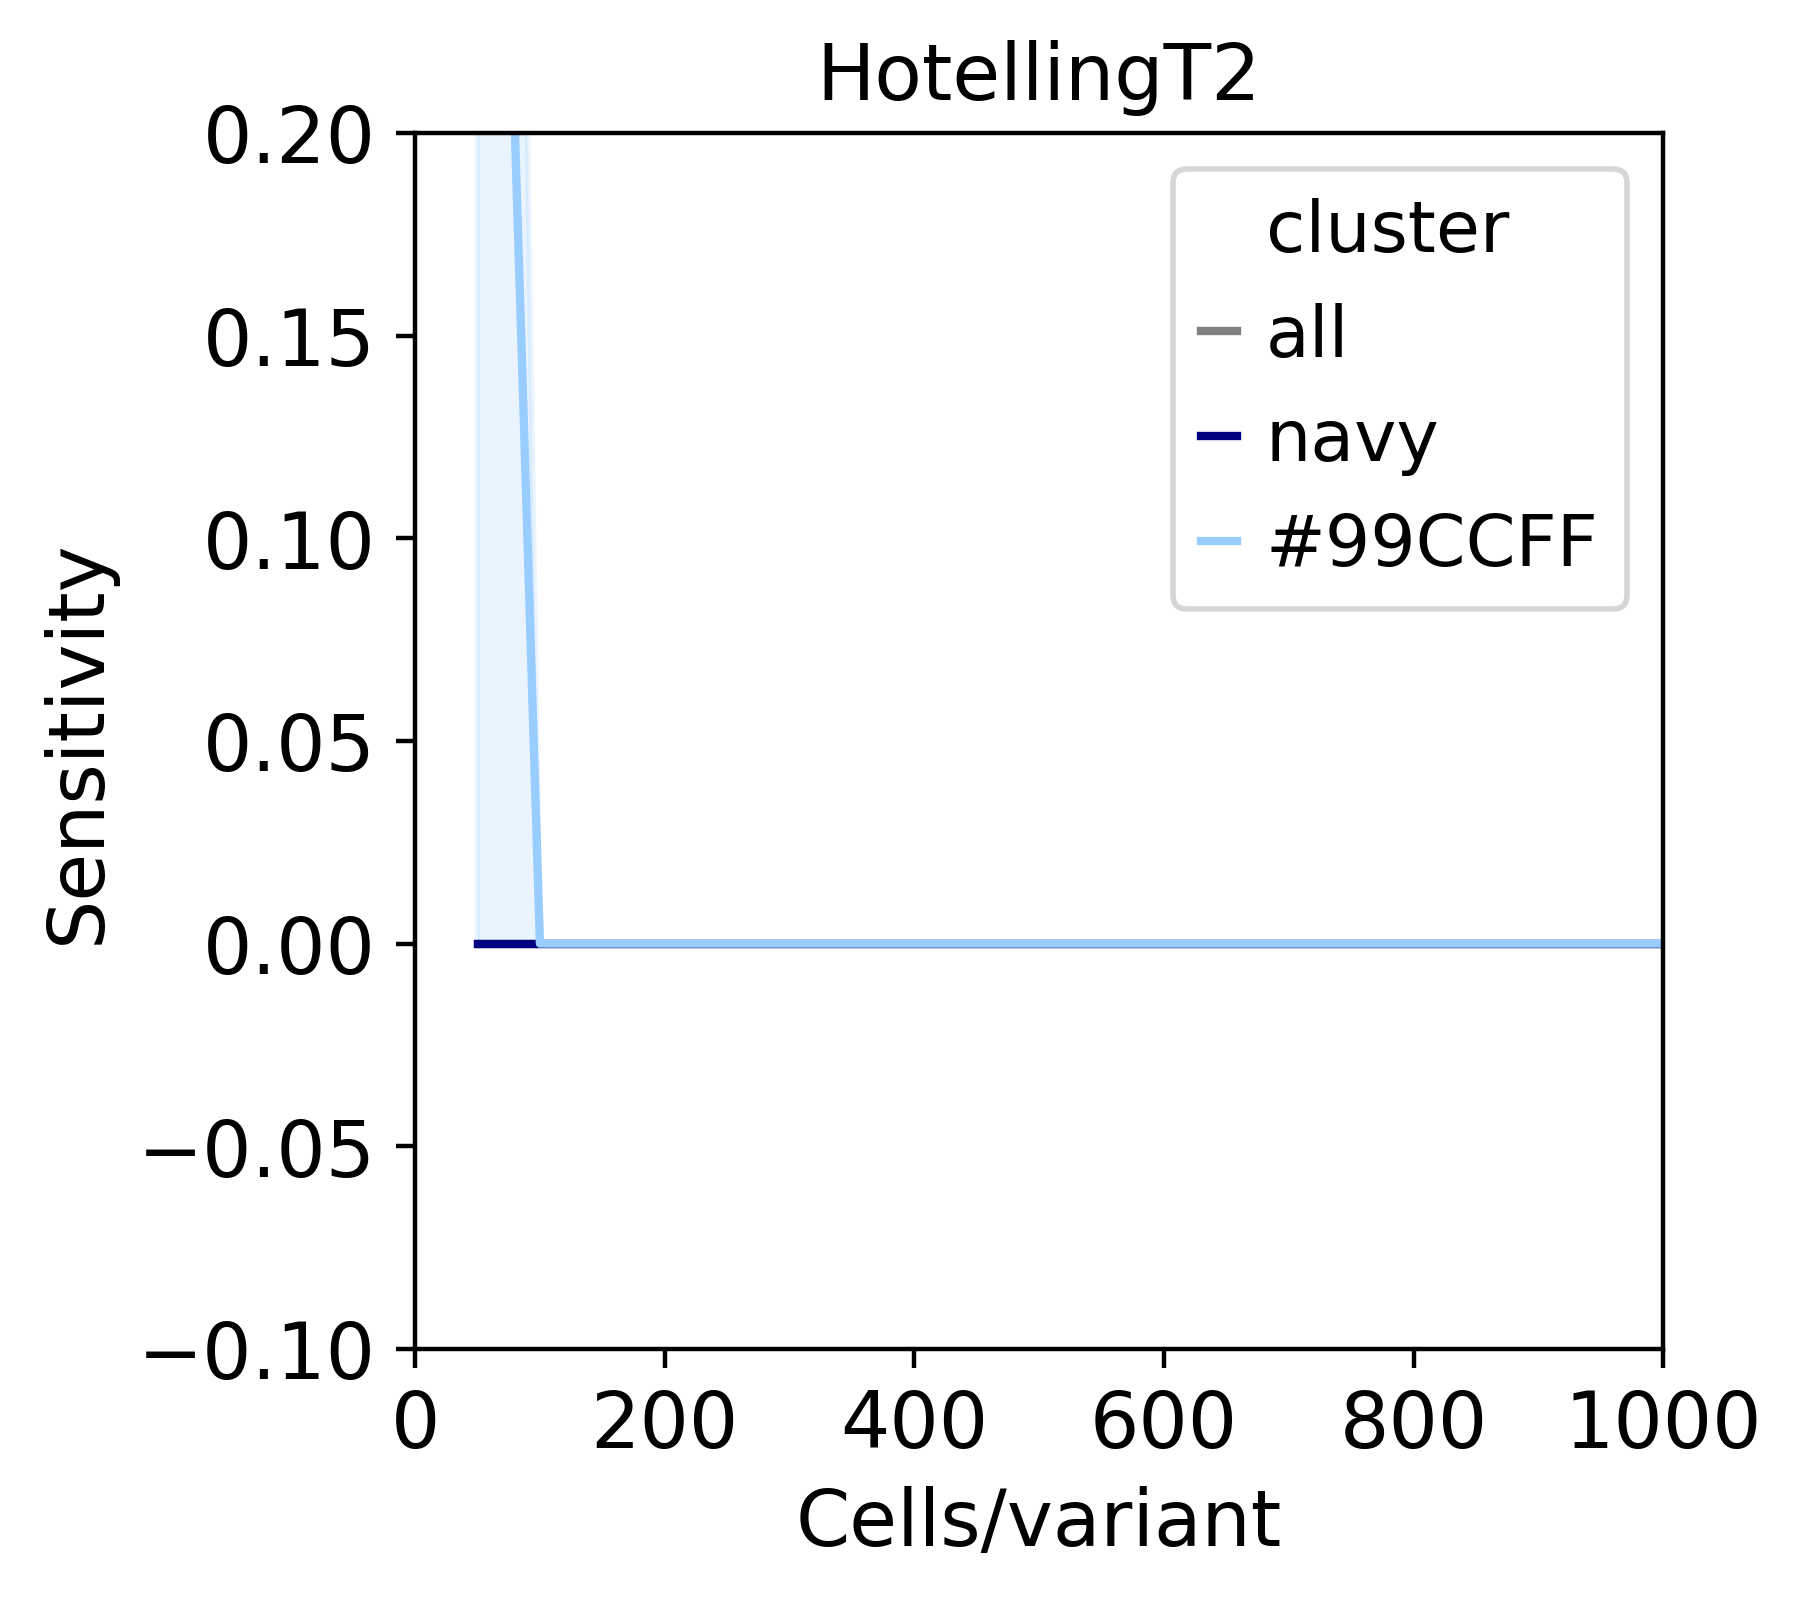

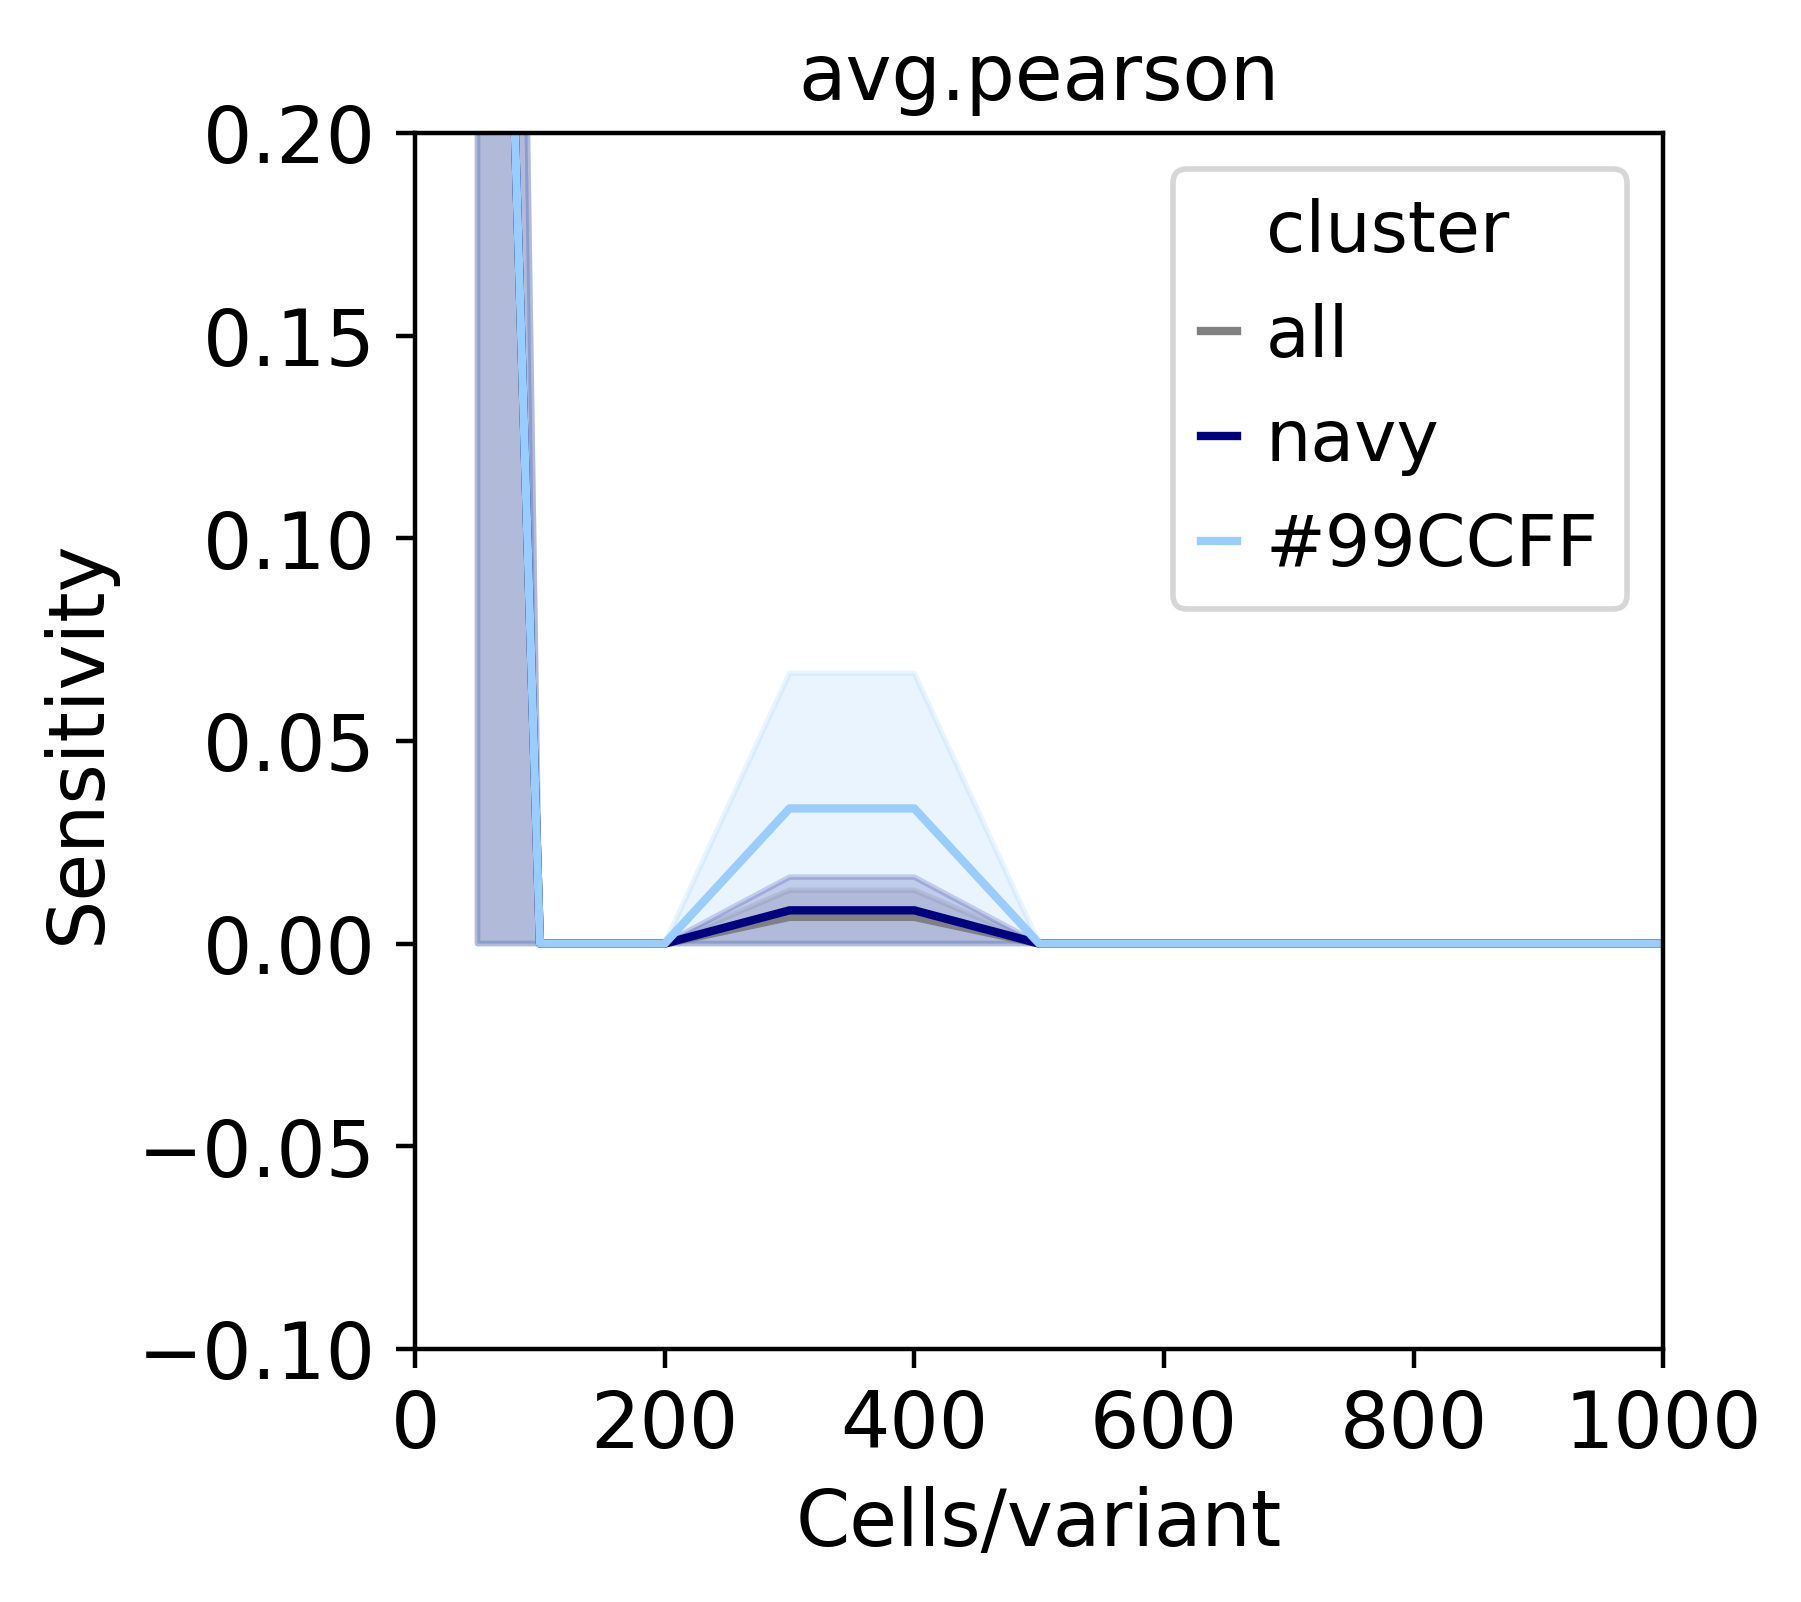

In [43]:
method='HotellingT2'

sns.lineplot(
    data=res[method].loc[res[method]['FDR']==fdr_total,:], 
    x="cells", y="FP",hue='cluster', 
    #cmap='tab20',
    #err_style="bars",
    palette=palette,
    ci=95,
)
plt.ylim(-0.1,0.2)
plt.xlim(0,1000)
plt.grid(False)
plt.xlabel('Cells/variant')
plt.ylabel('Sensitivity')
plt.title(method)
#plt.axvline(x=100)
#plt.axvline(x=200)
#plt.axvline(x=300)
plt.savefig(FIGS+'/FDR.'+method+'.'+PROTEIN+'.lowMOI.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/FDR.'+method+'.'+PROTEIN+'.lowMOI.png',bbox_inches = "tight")
plt.show()


#how to make lines with error bars
method='avg.pearson'

sns.lineplot(
    data=res[method].loc[res[method]['FDR']==fdr_total,:], 
    x="cells", y="FP",hue='cluster', 
    #cmap='tab20',
    #err_style="bars",
    palette=palette,
    ci=95,
)
plt.ylim(-0.1,0.2)
plt.grid(False)
plt.xlim(0,1000)
plt.xlabel('Cells/variant')
plt.ylabel('Sensitivity')
plt.title(method)
plt.savefig(FIGS+'/FDR.'+method+'.'+PROTEIN+'.lowMOI.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/FDR.'+method+'.'+PROTEIN+'.lowMOI.png',bbox_inches = "tight")
plt.show()